# Data exploration

In this notebook I tried to explore various pairs and compare results of preprocessing

### Load libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import os

mpl.rcParams['figure.figsize'] = (15, 10)
mpl.rcParams['axes.grid'] = False

In [2]:
import json
from binance.client import Client  # https://python-binance.readthedocs.io/en/latest/

## More data comparsion

I only had close prices of BTC,LTC,ETH,BCH now get some more and check if we can use them

#### Correlation between columns
Next function calculates correlation between columns in pandas df

In [3]:
def get_corr(df, column=str):
    
    """
    Calculates correlation between columns

    Parameters
    ----------
    column: str
        Column name to which corr will be calculated 
    
    df: DataFrame
        DataFrame from which correlations will be calculated
    
    Returns
    -------
    DataFrame with correlations
    
    Example
    --------
    get_corr(binance_df ,"BTCBUSD_close")  
    
    """
    
    correlations = []
    
    for col in list(df.columns):
        
        if column != col:
            
            corr_pair = df[column].corr(df[col])
            print("Corr {}/{} is {}".format(column, col, corr_pair))
            
            corr_dict = {}
            corr_dict.update({'pair':col,'correlation_with_btc':corr_pair}) 
            correlations.append(corr_dict)
            
    return pd.DataFrame(correlations) 

### Get all pairs

Get all pairs from binance to check which can be used

In [4]:
## Load credentials from json file
cr = open('cred.json',) 
data = json.load(cr)  

In [5]:
## Client
binance_client = Client(api_key=data["binance_api_key"], api_secret=data["binance_api_secret"])

In [6]:
def get_busd_pairs():
    
    """
    Get all BUSD pairs
    """
    
    pairs = binance_client.get_all_tickers()
    
    busd_pairs = []
    
    for i in range(len(pairs)):
        symbol = pairs[i]["symbol"]
        
        if "BUSD" == symbol[-4:]:
            busd_pairs.append(symbol)
    
    return busd_pairs

In [7]:
busd_list = get_busd_pairs()

In [8]:
def get_data(symbols=list):
    
    """
    Gets data for symbols. There are a lot of pairs that is why this gets only one week of data.

    Parameters
    ----------
    symbols: list
        List of symbols for which we want to get close prices
    
    Returns
    -------
    DataFrame with close prices
    
    """
    
    df_return = pd.DataFrame()
    
    for symbol in symbols:
        
        klines = binance_client.get_historical_klines(symbol, Client.KLINE_INTERVAL_1MINUTE, "1 Mar, 2021", "8 Mar, 2021")
        
        data = pd.DataFrame(klines, columns = ["timestamp", "open", "high", "low", "close", "volume", "close_time", "quote_av", "trades", "tb_base_av", "tb_quote_av", "ignore"])
        data["timestamp"] = pd.to_datetime(data["timestamp"], unit="ms")
        data.set_index("timestamp", inplace=True)
        data = data[["close"]]
        data.rename(columns={"close":f"{symbol}_close"}, inplace=True)

        
        if len(df_return) == 0:
            df_return = data
        else:
            df_return = df_return.join(data, on='timestamp')
    
    df_return = df_return.apply(pd.to_numeric) 
    return df_return



In [9]:
explore_df = get_data(busd_list)

In [10]:
explore_df

BNBBUSD_close  BTCBUSD_close  XRPBUSD_close  \
timestamp                                                          
2021-03-01 00:00:00       212.2693       45328.55        0.41742   
2021-03-01 00:01:00       213.3374       45437.83        0.41854   
2021-03-01 00:02:00       211.5243       45215.80        0.41496   
2021-03-01 00:03:00       210.6150       45120.01        0.41410   
2021-03-01 00:04:00       210.0000       45111.23        0.41392   
...                            ...            ...            ...   
2021-03-07 23:56:00       240.0000       51255.06        0.46566   
2021-03-07 23:57:00       239.7167       51161.07        0.46521   
2021-03-07 23:58:00       239.9865       51121.29        0.46577   
2021-03-07 23:59:00       239.9161       50989.04        0.46549   
2021-03-08 00:00:00       239.3767       50877.40        0.46598   

                     ETHBUSD_close  BCHABCBUSD_close  LTCBUSD_close  \
timestamp                                                             
2021-03-01 00:00:00        1427.69               NaN         165.86   
2021-03-01 00:01:00        1429.74               NaN         166.24   
2021-03-01 00:02:00        1422.42               NaN         164.95   
2021-03-01 00:03:00        1417.84               NaN         164.64   
2021-03-01 00:04:00        1417.03               NaN         164.72   
...                            ...               ...            ...   
2021-03-07 23:56:00        1724.01               NaN         190.84   
2021-03-07 23:57:00        1720.94               NaN         190.62   
2021-03-07 23:58:00        1723.97               NaN         190.79   
2021-03-07 23:59:00        1727.07               NaN         190.80   
2021-03-08 00:00:00        1729.34               NaN         190.70   

                     LINKBUSD_close  ETCBUSD_close  TRXBUSD_close  \
timestamp                                                           
2021-03-01 00:00:00         24.8668        10.4525        0.04590   
2021-03-01 00:01:00         24.9390        10.4533        0.04594   
2021-03-01 00:02:00         24.8349        10.4164        0.04587   
2021-03-01 00:03:00         24.7473        10.4167        0.04582   
2021-03-01 00:04:00         24.7007        10.4153        0.04577   
...                             ...            ...            ...   
2021-03-07 23:56:00         28.5606        11.5300        0.05171   
2021-03-07 23:57:00         28.5465        11.5142        0.05165   
2021-03-07 23:58:00         28.5618        11.5511        0.05183   
2021-03-07 23:59:00         28.5854        11.5443        0.05173   
2021-03-08 00:00:00         28.6302        11.5631        0.05182   

                     EOSBUSD_close  ...  OMBUSD_close  PONDBUSD_close  \
timestamp                           ...                                 
2021-03-01 00:00:00         3.4907  ...           NaN             NaN   
2021-03-01 00:01:00         3.4959  ...           NaN             NaN   
2021-03-01 00:02:00         3.4799  ...           NaN             NaN   
2021-03-01 00:03:00         3.4789  ...           NaN             NaN   
2021-03-01 00:04:00         3.4758  ...           NaN             NaN   
...                            ...  ...           ...             ...   
2021-03-07 23:56:00         3.8317  ...           NaN             NaN   
2021-03-07 23:57:00         3.8255  ...           NaN             NaN   
2021-03-07 23:58:00         3.8359  ...           NaN             NaN   
2021-03-07 23:59:00         3.8296  ...           NaN             NaN   
2021-03-08 00:00:00         3.8297  ...           NaN             NaN   

                     DEGOBUSD_close  ALICEBUSD_close  CHZBUSD_close  \
timestamp                                                             
2021-03-01 00:00:00             NaN              NaN            NaN   
2021-03-01 00:01:00             NaN              NaN            NaN   
2021-03-01 00:02:00             NaN              NaN            NaN   
2021-03-0

In [11]:
explore_df.dropna(axis='columns', inplace=True)

In [12]:
corr_df = get_corr(explore_df ,"BTCBUSD_close") 

Corr BTCBUSD_close/BNBBUSD_close is 0.5897383384677103
Corr BTCBUSD_close/XRPBUSD_close is 0.39599713763983413
Corr BTCBUSD_close/ETHBUSD_close is 0.8102522845358556
Corr BTCBUSD_close/LTCBUSD_close is 0.8831838798093526
Corr BTCBUSD_close/LINKBUSD_close is 0.8129036439872888
Corr BTCBUSD_close/ETCBUSD_close is 0.900177674912808
Corr BTCBUSD_close/TRXBUSD_close is 0.4594708899704324
Corr BTCBUSD_close/EOSBUSD_close is 0.8746703681137284
Corr BTCBUSD_close/XLMBUSD_close is 0.6419967639087228
Corr BTCBUSD_close/ADABUSD_close is 0.1076425873245349
Corr BTCBUSD_close/BCHBUSD_close is 0.7961348716014576
Corr BTCBUSD_close/QTUMBUSD_close is 0.295230367848928
Corr BTCBUSD_close/VETBUSD_close is 0.5417900100832025
Corr BTCBUSD_close/EURBUSD_close is 0.17609335116333555
Corr BTCBUSD_close/ICXBUSD_close is 0.5328703965334253
Corr BTCBUSD_close/BNTBUSD_close is 0.38921918757698015
Corr BTCBUSD_close/ATOMBUSD_close is 0.6429379103853363
Corr BTCBUSD_close/DASHBUSD_close is 0.742531645773841
Corr B

Lets check how correlatoins look like plotted (similar and different) 

YFIIBUSD_close correlation is 0.8649552857830676

HEGICBUSD_close correlation is -0.055538272671668325


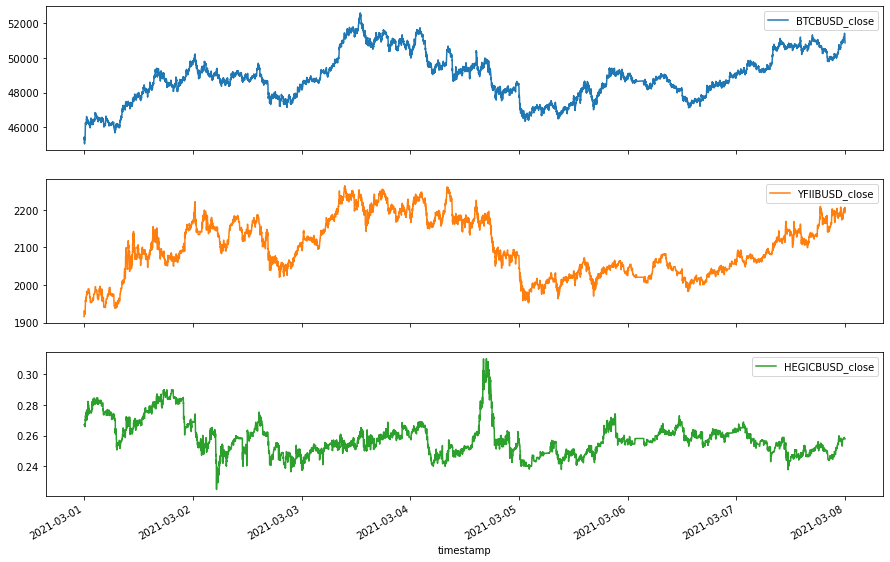

In [13]:
explore_df[["BTCBUSD_close","YFIIBUSD_close","HEGICBUSD_close"]].plot(subplots=True)
plt.show()

In [14]:
ordered_df = corr_df.groupby("correlation_with_btc").sum().reset_index()
ordered_df.sort_values("correlation_with_btc", ascending=False, inplace=True)

In [15]:
ordered_df.head(30)

correlation_with_btc            pair
137              0.927610   ZECBUSD_close
136              0.922255   NEOBUSD_close
135              0.900178   ETCBUSD_close
134              0.883184   LTCBUSD_close
133              0.874670   EOSBUSD_close
132              0.873894   FLMBUSD_close
131              0.865126   PSGBUSD_close
130              0.864955  YFIIBUSD_close
129              0.856502  BZRXBUSD_close
128              0.837391  BANDBUSD_close
127              0.828099   GRTBUSD_close
126              0.822604   ZRXBUSD_close
125              0.819866   RSRBUSD_close
124              0.815325   SXPBUSD_close
123              0.812904  LINKBUSD_close
122              0.810252   ETHBUSD_close
121              0.809456   TWTBUSD_close
120              0.802126   ZILBUSD_close
119              0.801413   TRUBUSD_close
118              0.800005  AAVEBUSD_close
117              0.796135   BCHBUSD_close
116              0.790330  DODOBUSD_close
115              0.788277   OMGBUSD_close
114              0.785985   LRCBUSD_close
113              0.784538   JUVBUSD_close
112              0.783258   BTTBUSD_close
111              0.776769  RUNEBUSD_close
110              0.773647   YFIBUSD_close
109              0.763212  NANOBUSD_close
108              0.762738   KSMBUSD_close

Take first thirty and get more data for them

In [16]:
list(ordered_df.pair[:33])

['ZECBUSD_close',
 'NEOBUSD_close',
 'ETCBUSD_close',
 'LTCBUSD_close',
 'EOSBUSD_close',
 'FLMBUSD_close',
 'PSGBUSD_close',
 'YFIIBUSD_close',
 'BZRXBUSD_close',
 'BANDBUSD_close',
 'GRTBUSD_close',
 'ZRXBUSD_close',
 'RSRBUSD_close',
 'SXPBUSD_close',
 'LINKBUSD_close',
 'ETHBUSD_close',
 'TWTBUSD_close',
 'ZILBUSD_close',
 'TRUBUSD_close',
 'AAVEBUSD_close',
 'BCHBUSD_close',
 'DODOBUSD_close',
 'OMGBUSD_close',
 'LRCBUSD_close',
 'JUVBUSD_close',
 'BTTBUSD_close',
 'RUNEBUSD_close',
 'YFIBUSD_close',
 'NANOBUSD_close',
 'KSMBUSD_close',
 'ALGOBUSD_close',
 'XTZBUSD_close',
 'LITBUSD_close']

#### Load data

In [17]:
pairs_to_explore = ["BTCBUSD","ZECBUSD","NEOBUSD","ETCBUSD","LTCBUSD","EOSBUSD","FLMBUSD","YFIIBUSD","BZRXBUSD","BANDBUSD","GRTBUSD","ZRXBUSD","RSRBUSD","SXPBUSD","LINKBUSD","ETHBUSD","TWTBUSD","ZILBUSD","TRUBUSD","AAVEBUSD","BCHBUSD","DODOBUSD","OMGBUSD","LRCBUSD","BTTBUSD","RUNEBUSD","YFIBUSD","NANOBUSD","KSMBUSD","ALGOBUSD","XLMBUSD", "ADABUSD"]

In [18]:
binance_df = pd.DataFrame()

for ratio in pairs_to_explore:
    
    dataset = "crypto_data/final_data/"+ratio+"-1m-data.csv"
    df = pd.read_csv(dataset, index_col="timestamp")
    df.rename(columns={"close": f"{ratio}_close"}, inplace=True)

    df = df[[f"{ratio}_close"]]
    
    ## There are missing values between those dates
    df = df[(df.index < "2020-12-21 13:20:00") | (df.index > "2020-12-21 18:00:00")]
    
    df = df[:468000] ## data start on the same date but ending dates are different

    
    if len(binance_df) == 0:
        binance_df = df
    else:
        binance_df = binance_df.join(df, on='timestamp')

In [19]:
binance_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 468000 entries, 2020-05-01 00:00:00 to 2021-03-22 12:59:00
Data columns (total 32 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   BTCBUSD_close   468000 non-null  float64
 1   ZECBUSD_close   468000 non-null  float64
 2   NEOBUSD_close   468000 non-null  float64
 3   ETCBUSD_close   468000 non-null  float64
 4   LTCBUSD_close   468000 non-null  float64
 5   EOSBUSD_close   468000 non-null  float64
 6   FLMBUSD_close   251790 non-null  float64
 7   YFIIBUSD_close  290430 non-null  float64
 8   BZRXBUSD_close  294990 non-null  float64
 9   BANDBUSD_close  38850 non-null   float64
 10  GRTBUSD_close   38850 non-null   float64
 11  ZRXBUSD_close   338310 non-null  float64
 12  RSRBUSD_close   300750 non-null  float64
 13  SXPBUSD_close   370890 non-null  float64
 14  LINKBUSD_close  468000 non-null  float64
 15  ETHBUSD_close   468000 non-null  float64
 16  TWTBUSD_close   77891 non-null

In [20]:
binance_df

BTCBUSD_close  ZECBUSD_close  NEOBUSD_close  \
timestamp                                                          
2020-05-01 00:00:00        8645.40          44.81          8.901   
2020-05-01 00:01:00        8658.51          44.81          8.901   
2020-05-01 00:02:00        8634.90          44.81          8.901   
2020-05-01 00:03:00        8643.29          45.00          8.901   
2020-05-01 00:04:00        8637.21          44.86          8.901   
...                            ...            ...            ...   
2021-03-22 12:55:00       57190.25         147.52         42.926   
2021-03-22 12:56:00       57256.88         147.52         42.964   
2021-03-22 12:57:00       57363.15         147.52         43.026   
2021-03-22 12:58:00       57315.78         147.96         43.047   
2021-03-22 12:59:00       57280.02         147.96         43.033   

                     ETCBUSD_close  LTCBUSD_close  EOSBUSD_close  \
timestamp                                                          
2020-05-01 00:00:00         6.4306          46.36         2.8253   
2020-05-01 00:01:00         6.4708          46.56         2.8339   
2020-05-01 00:02:00         6.4621          46.56         2.8253   
2020-05-01 00:03:00         6.4571          46.53         2.8291   
2020-05-01 00:04:00         6.4571          46.48         2.8309   
...                            ...            ...            ...   
2021-03-22 12:55:00        12.0662         194.91         4.2875   
2021-03-22 12:56:00        12.1004         195.32         4.2956   
2021-03-22 12:57:00        12.1197         195.71         4.2975   
2021-03-22 12:58:00        12.1011         195.55         4.2971   
2021-03-22 12:59:00        12.1052         195.38         4.2875   

                     FLMBUSD_close  YFIIBUSD_close  BZRXBUSD_close  \
timestamp                                                            
2020-05-01 00:00:00            NaN             NaN             NaN   
2020-05-01 00:01:00            NaN             NaN             NaN   
2020-05-01 00:02:00            NaN             NaN             NaN   
2020-05-01 00:03:00            NaN             NaN             NaN   
2020-05-01 00:04:00            NaN             NaN             NaN   
...                            ...             ...             ...   
2021-03-22 12:55:00         0.5471         2364.25          0.5746   
2021-03-22 12:56:00         0.5471         2364.25          0.5746   
2021-03-22 12:57:00         0.5491         2364.25          0.5746   
2021-03-22 12:58:00         0.5491         2364.25          0.5746   
2021-03-22 12:59:00         0.5491         2364.25          0.5746   

                     BANDBUSD_close  ...  OMGBUSD_close  LRCBUSD_close  \
timestamp                            ...                                 
2020-05-01 00:00:00             NaN  ...            NaN            NaN   
2020-05-01 00:01:00             NaN  ...            NaN            NaN   
2020-05-01 00:02:00             NaN  ...            NaN            NaN   
2020-05-01 00:03:00             NaN  ...            NaN            NaN   
2020-05-01 00:04:00             NaN  ...            NaN            NaN   
...                             ...  ...            ...            ...   
2021-03-22 12:55:00          14.587  ...         5.7069        0.55298   
2021-03-22 12:56:00          14.647  ...         5.7069        0.55441   
2021-03-22 12:57:00          14.681  ...         5.7083        0.55492   
2021-03-22 12:58:00          14.685  ...         5.6920        0.55302   
2021-03-22 12:59:00          14.648  ...         5.6920        0.55475   

                     BTTBUSD_close  RUNEBUSD_close  YFIBUSD_close  \
timestamp                                                           
2020-05-01 00:00:00       0.000257             NaN            NaN   
2020-05-01 00:01:00       0.000257             NaN            NaN   
2020-05-01 00:02:00       0.000257             NaN            NaN   
2020-05-01 00:03:00       0.0002

In [21]:
binance_df.describe()

BTCBUSD_close  ZECBUSD_close  NEOBUSD_close  ETCBUSD_close  \
count  468000.000000  468000.000000  468000.000000  468000.000000   
mean    20309.428037      75.175920      18.957759       7.066795   
std     14735.524186      29.159217       9.420720       2.294538   
min      8178.150000      37.820000       8.653000       4.611200   
25%      9766.472500      56.360000      11.735000       5.670300   
50%     11771.585000      64.400000      16.960000       6.437500   
75%     28765.005000      84.062500      21.239000       7.246900   
max     61781.150000     189.830000      55.389000      17.833100   

       LTCBUSD_close  EOSBUSD_close  FLMBUSD_close  YFIIBUSD_close  \
count  468000.000000  468000.000000  251790.000000   290430.000000   
mean       86.029632       2.949144       0.275560     2307.302586   
std        54.671208       0.571326       0.146147     1024.471136   
min        39.000000       1.995400       0.118600      974.090000   
25%        46.210000       2.580800       0.170000     1750.320000   
50%        57.770000       2.735500       0.211000     1992.000000   
75%       128.070000       3.081125       0.358600     2373.250000   
max       247.020000       5.607500       2.343100     9775.510000   

       BZRXBUSD_close  BANDBUSD_close  ...  OMGBUSD_close  LRCBUSD_close  \
count   294990.000000    38850.000000  ...   38850.000000  407040.000000   
mean         0.326535       13.423456  ...       5.037802       0.267383   
std          0.222868        0.861037  ...       0.465002       0.185540   
min          0.088400       10.915000  ...       3.732700       0.072050   
25%          0.166900       12.741000  ...       4.668125       0.145370   
50%          0.248100       13.443000  ...       5.034900       0.187660   
75%          0.452900       14.106000  ...       5.280000       0.381550   
max          1.700000       16.352000  ...       6.337300       0.886470   

       BTTBUSD_close  RUNEBUSD_close  YFIBUSD_close  NANOBUSD_close  \
count  468000.000000   346590.000000  322050.000000   468000.000000   
mean        0.000487        1.725210   25617.559275        1.794278   
std         0.000423        1.724393    9568.071536        1.655251   
min         0.000246        0.324300    3708.010000        0.563500   
25%         0.000302        0.568400   17700.000000        0.846200   
50%         0.000337        0.894000   26040.060000        1.027900   
75%         0.000402        2.031700   32620.290000        1.306700   
max         0.003947        6.760000   52155.540000        7.864200   

       KSMBUSD_close  ALGOBUSD_close  XLMBUSD_close  ADABUSD_close  
count  288990.000000   468000.000000  468000.000000  468000.000000  
mean       93.402659        0.454740       0.160728       0.260787  
std        89.619400        0.313574       0.126608       0.330576  
min        23.443000        0.176000       0.058980       0.042710  
25%        34.432000        0.262600       0.075400       0.093530  
50%        51.462000        0.327900       0.096080       0.122800  
75%       106.973000        0.518700       0.189490       0.179550  
max       451.888000        1.844800       0.607080       1.484090  

[8 rows x 32 columns]

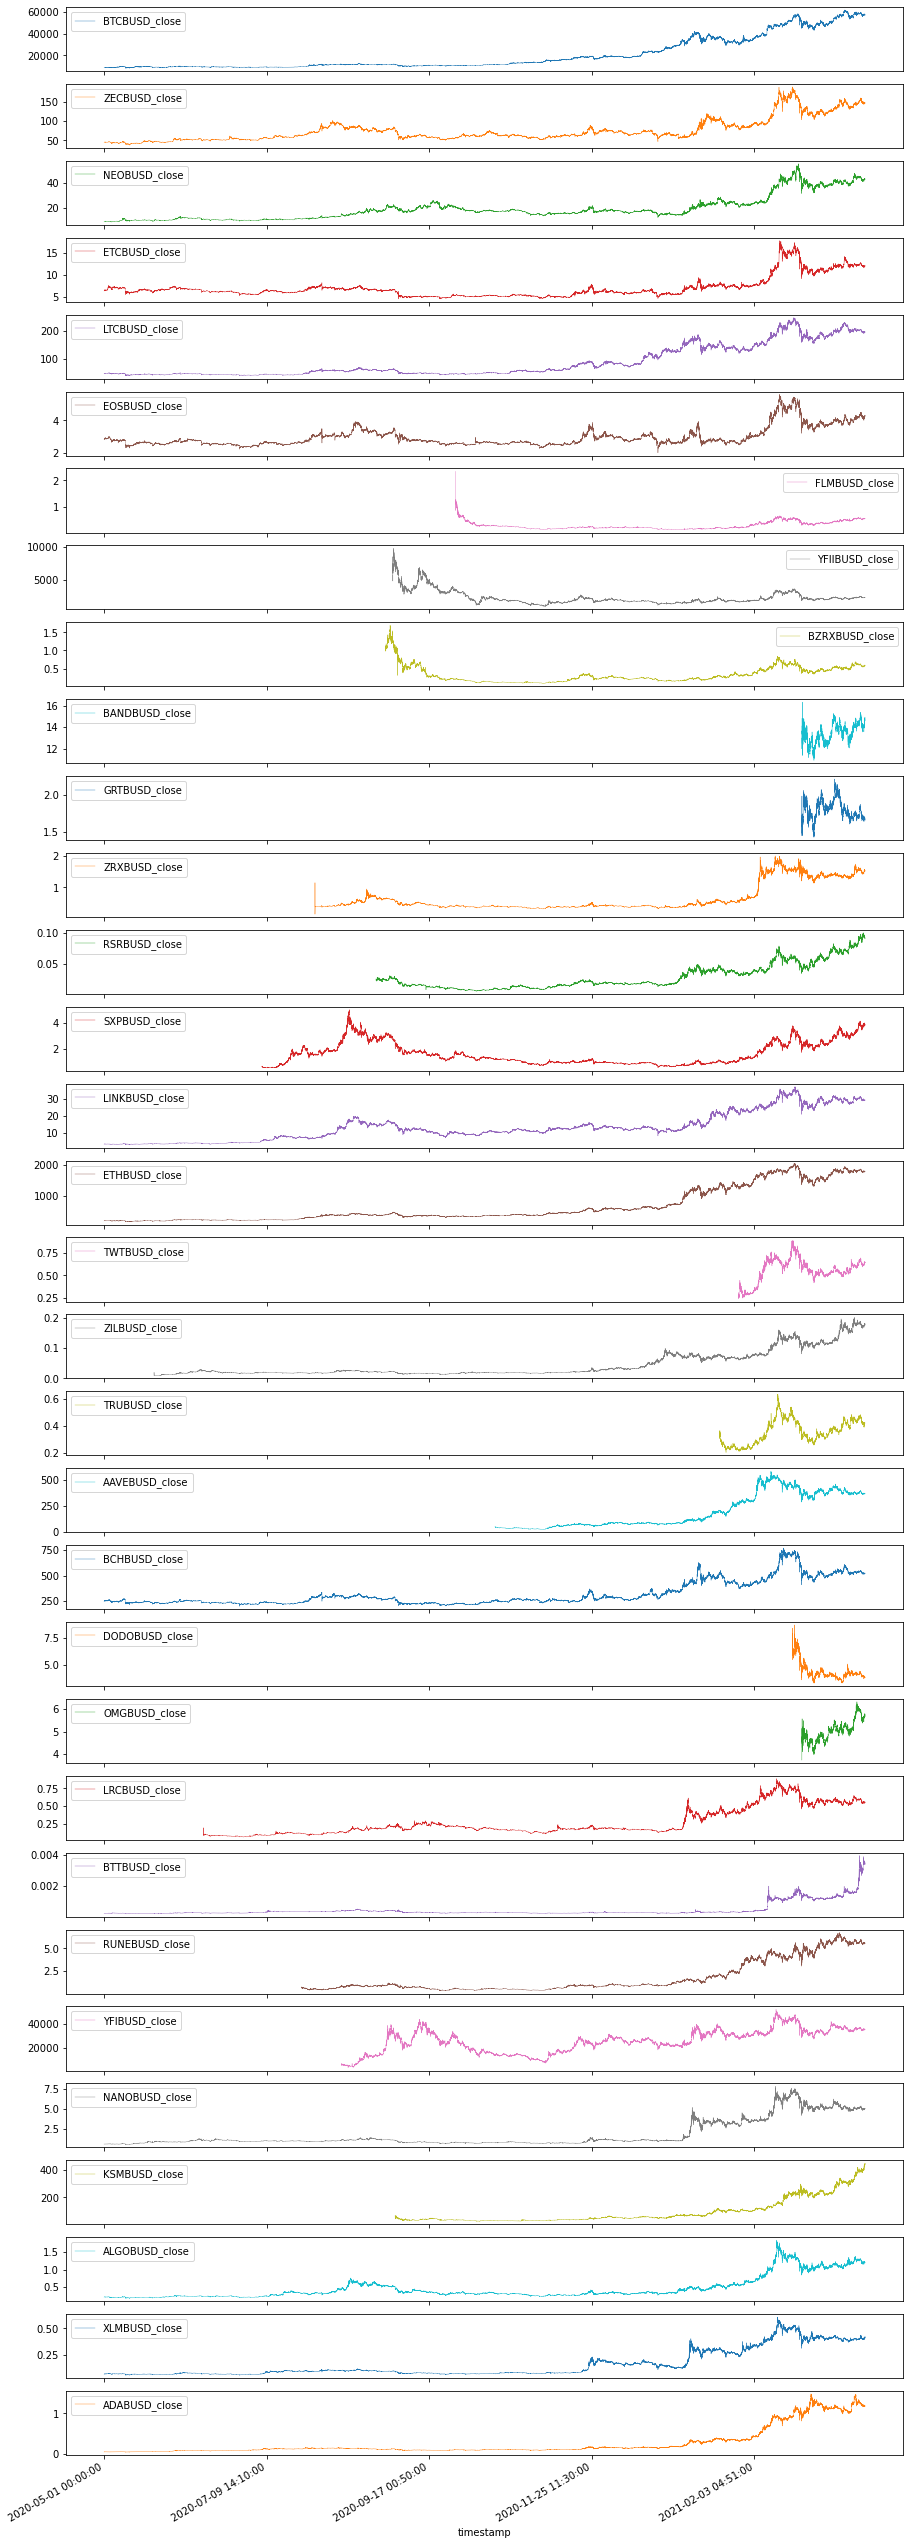

In [22]:
binance_df.plot(linewidth=0.4, subplots=True, figsize=(15, 50))
plt.show()

In [23]:
binance_df = binance_df[200000:]

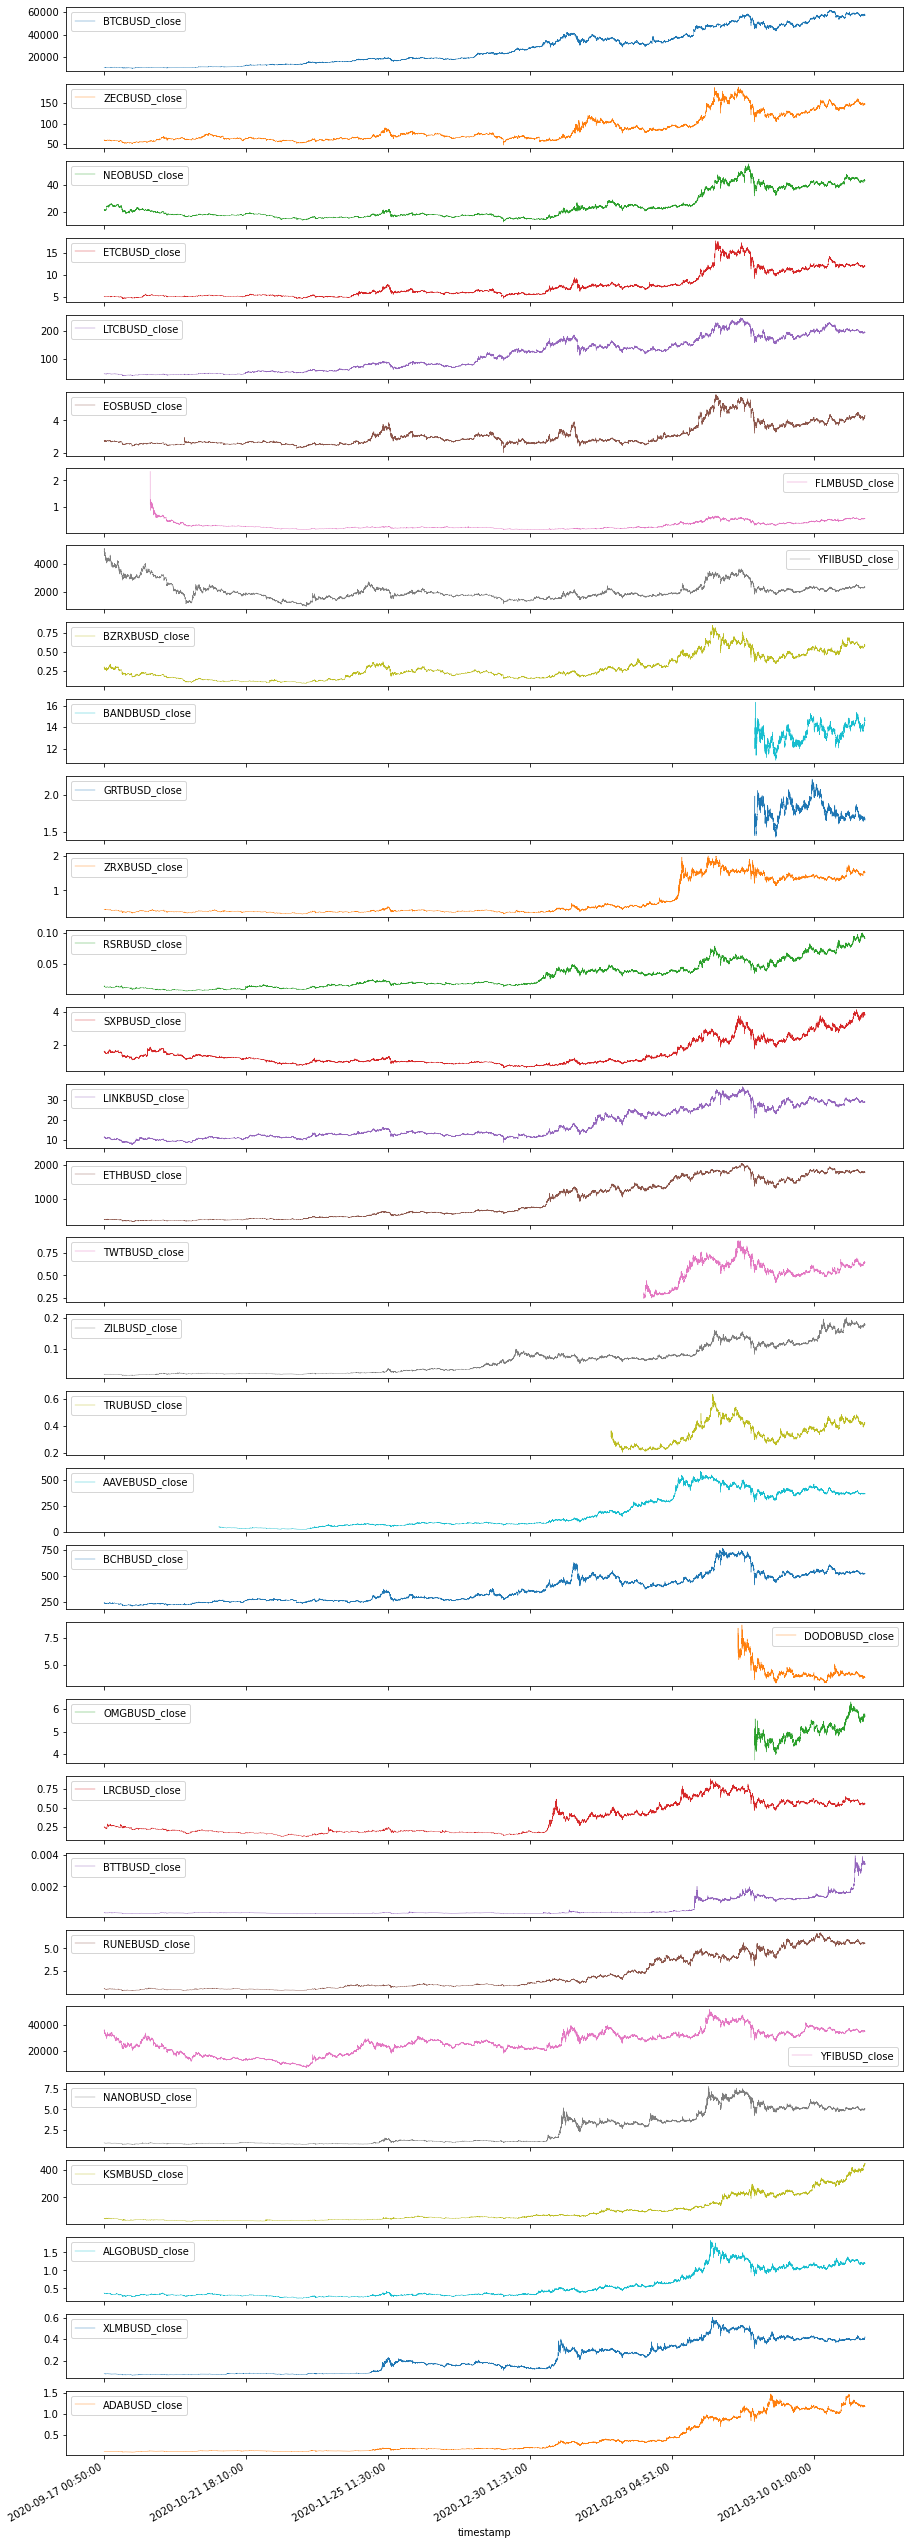

In [24]:
binance_df.plot(linewidth=0.4, subplots=True, figsize=(15, 50))
plt.show()

In [25]:
corr_final_df = get_corr(binance_df ,"BTCBUSD_close") 

Corr BTCBUSD_close/ZECBUSD_close is 0.9067417633221052
Corr BTCBUSD_close/NEOBUSD_close is 0.8717231275631527
Corr BTCBUSD_close/ETCBUSD_close is 0.9139395697549773
Corr BTCBUSD_close/LTCBUSD_close is 0.9824627706964263
Corr BTCBUSD_close/EOSBUSD_close is 0.8207334424770495
Corr BTCBUSD_close/FLMBUSD_close is 0.4914276231856453
Corr BTCBUSD_close/YFIIBUSD_close is 0.1395881263715067
Corr BTCBUSD_close/BZRXBUSD_close is 0.8550604717416225
Corr BTCBUSD_close/BANDBUSD_close is 0.7394476124858828
Corr BTCBUSD_close/GRTBUSD_close is 0.0955943568807272
Corr BTCBUSD_close/ZRXBUSD_close is 0.8726834134684794
Corr BTCBUSD_close/RSRBUSD_close is 0.9599789117852809
Corr BTCBUSD_close/SXPBUSD_close is 0.758379041693611
Corr BTCBUSD_close/LINKBUSD_close is 0.9337670176886025
Corr BTCBUSD_close/ETHBUSD_close is 0.973293615903661
Corr BTCBUSD_close/TWTBUSD_close is 0.6811347974886512
Corr BTCBUSD_close/ZILBUSD_close is 0.9698343675199446
Corr BTCBUSD_close/TRUBUSD_close is 0.7795155934628172
Corr BTC

In [26]:
ordered_final_df = corr_final_df.groupby("correlation_with_btc").sum().reset_index()
ordered_final_df.sort_values("correlation_with_btc", ascending=False, inplace=True)

In [27]:
ordered_final_df

correlation_with_btc            pair
30              0.982463   LTCBUSD_close
29              0.973294   ETHBUSD_close
28              0.969834   ZILBUSD_close
27              0.959979   RSRBUSD_close
26              0.946998   XLMBUSD_close
25              0.944393  NANOBUSD_close
24              0.943659   BCHBUSD_close
23              0.940005  RUNEBUSD_close
22              0.933767  LINKBUSD_close
21              0.918894   ADABUSD_close
20              0.913940   ETCBUSD_close
19              0.906805  ALGOBUSD_close
18              0.906742   ZECBUSD_close
17              0.905541   KSMBUSD_close
16              0.892626   LRCBUSD_close
15              0.891191  AAVEBUSD_close
14              0.872683   ZRXBUSD_close
13              0.871723   NEOBUSD_close
12              0.855060  BZRXBUSD_close
11              0.847776   OMGBUSD_close
10              0.820733   EOSBUSD_close
9               0.809049   YFIBUSD_close
8               0.797311   BTTBUSD_close
7               0.779516   TRUBUSD_close
6               0.758379   SXPBUSD_close
5               0.739448  BANDBUSD_close
4               0.681135   TWTBUSD_close
3               0.491428   FLMBUSD_close
2               0.141221  DODOBUSD_close
1               0.139588  YFIIBUSD_close
0               0.095594   GRTBUSD_close

In [28]:
binance_df = binance_df[list(ordered_final_df.pair[:10])]

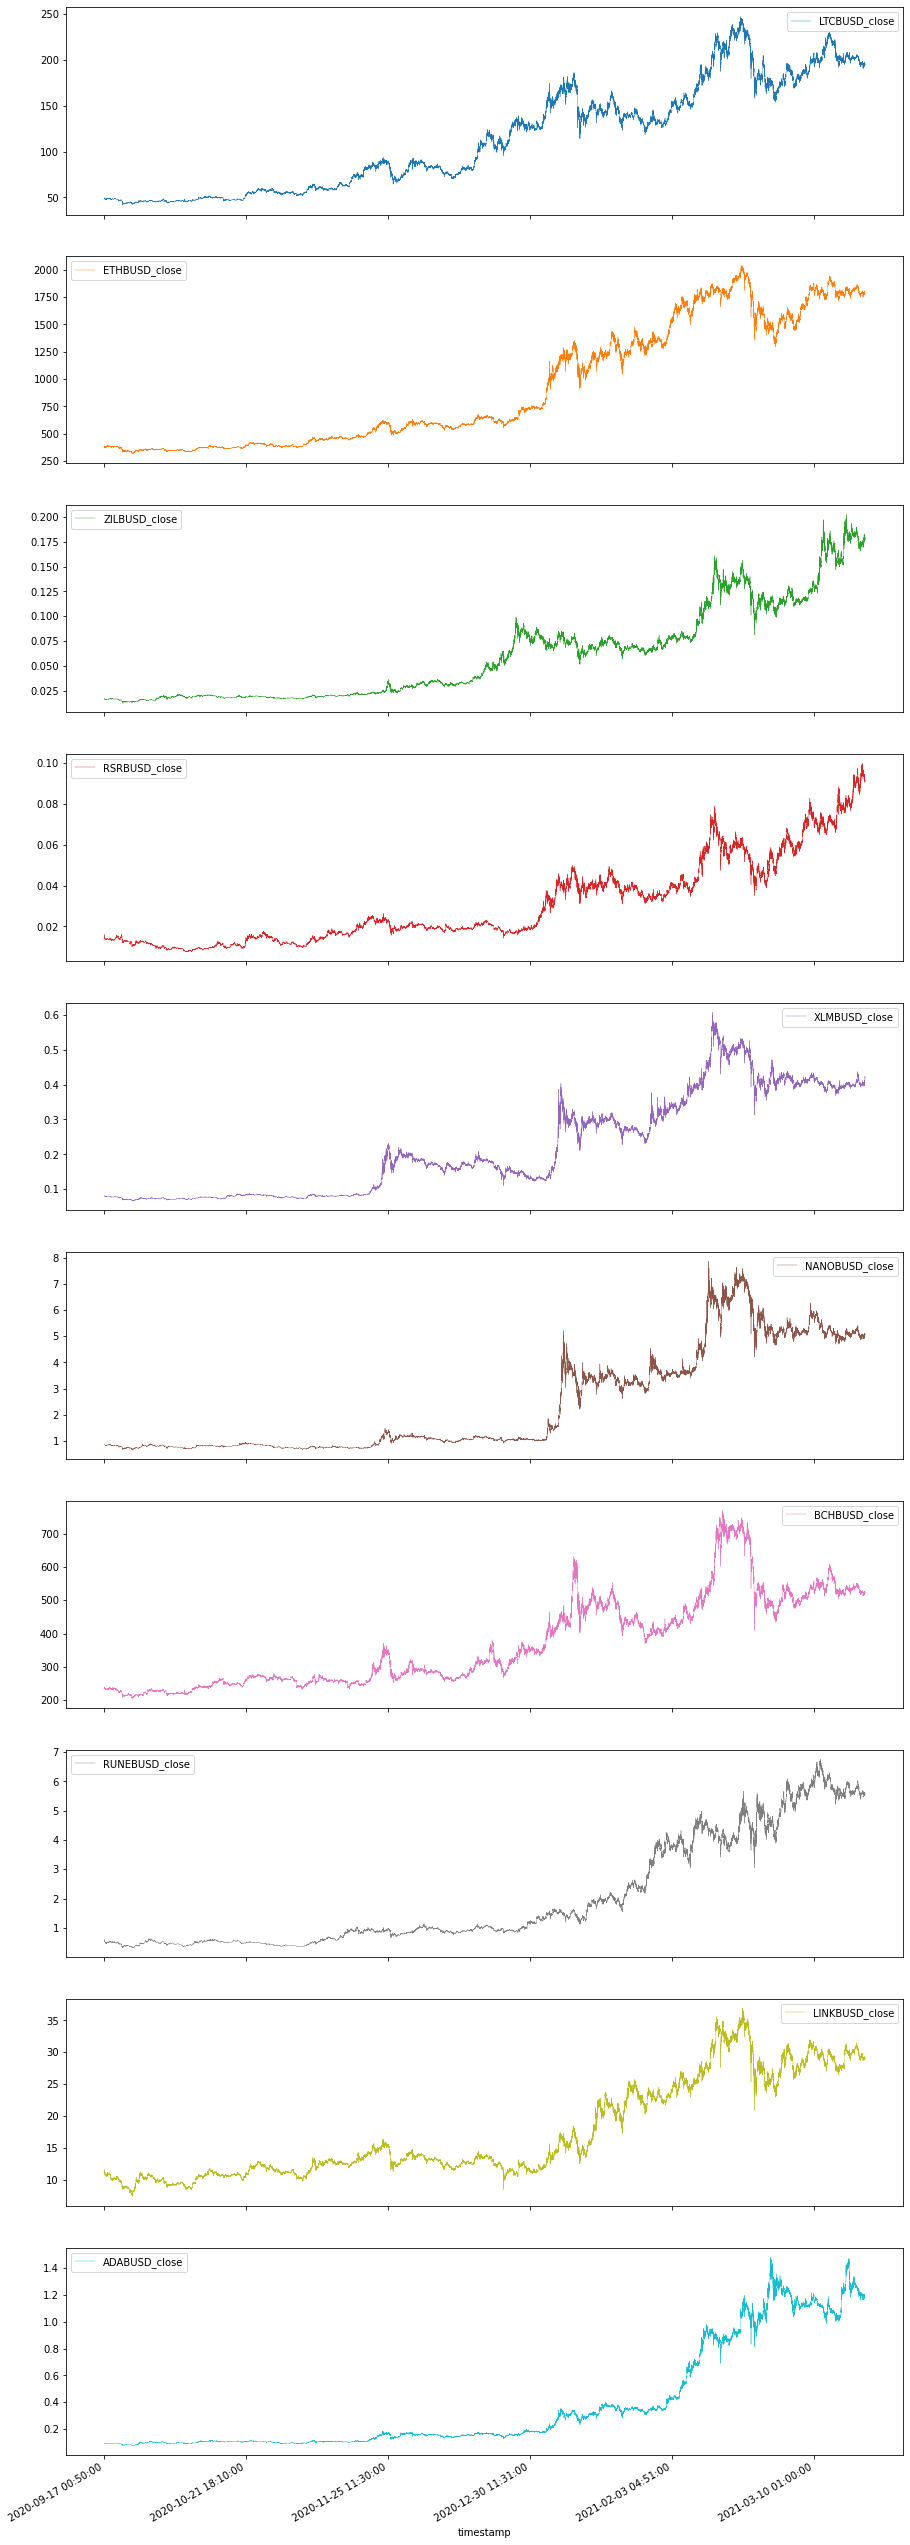

In [29]:
binance_df.plot(linewidth=0.4, subplots=True, figsize=(15, 50))
plt.show()

In [30]:
binance_df.describe()

LTCBUSD_close  ETHBUSD_close  ZILBUSD_close  RSRBUSD_close  \
count   268000.00000  268000.000000  268000.000000  268000.000000   
mean       113.87307     921.146558       0.060787       0.030920   
std         58.06218     555.414106       0.046740       0.020988   
min         41.64000     314.720000       0.012750       0.007530   
25%         57.57000     408.477500       0.019720       0.014440   
50%        104.56000     615.505000       0.045635       0.020730   
75%        161.22000    1442.647500       0.081280       0.041870   
max        247.02000    2040.020000       0.202430       0.099840   

       XLMBUSD_close  NANOBUSD_close  BCHBUSD_close  RUNEBUSD_close  \
count  268000.000000   268000.000000  268000.000000   268000.000000   
mean        0.218384        2.404598     369.634171        2.015012   
std         0.141606        1.972774     134.876098        1.861896   
min         0.066730        0.663800     203.730000        0.324300   
25%         0.081290        0.818500     257.720000        0.552400   
50%         0.171940        1.103800     314.320000        0.978700   
75%         0.340670        3.720100     483.800000        3.750000   
max         0.607080        7.864200     771.110000        6.760000   

       LINKBUSD_close  ADABUSD_close  
count   268000.000000  268000.000000  
mean        17.379706       0.382647  
std          7.641572       0.394145  
min          7.357400       0.075480  
25%         11.410000       0.106150  
50%         13.349950       0.162590  
75%         24.429200       0.432820  
max         36.929800       1.484090

In [31]:
binance_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 268000 entries, 2020-09-17 00:50:00 to 2021-03-22 12:59:00
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LTCBUSD_close   268000 non-null  float64
 1   ETHBUSD_close   268000 non-null  float64
 2   ZILBUSD_close   268000 non-null  float64
 3   RSRBUSD_close   268000 non-null  float64
 4   XLMBUSD_close   268000 non-null  float64
 5   NANOBUSD_close  268000 non-null  float64
 6   BCHBUSD_close   268000 non-null  float64
 7   RUNEBUSD_close  268000 non-null  float64
 8   LINKBUSD_close  268000 non-null  float64
 9   ADABUSD_close   268000 non-null  float64
dtypes: float64(10)
memory usage: 22.5+ MB


In [32]:
binance_symbols = list(binance_df.columns)

Get pairs without _close to load them

In [33]:
for i in range(len(binance_symbols)):
    
    head = binance_symbols[i].partition("_")
    
    binance_symbols[i] = head[0]

In [34]:
binance_symbols.insert(0, "BTCBUSD")

In [35]:
binance_symbols

['BTCBUSD',
 'LTCBUSD',
 'ETHBUSD',
 'ZILBUSD',
 'RSRBUSD',
 'XLMBUSD',
 'NANOBUSD',
 'BCHBUSD',
 'RUNEBUSD',
 'LINKBUSD',
 'ADABUSD']

### Loading saved datasets

#### Loading binance dataset


In [36]:
main_df = pd.DataFrame()

for ratio in binance_symbols:
    
    dataset = "crypto_data/final_data/"+ratio+"-1m-data.csv"
    df = pd.read_csv(dataset, index_col="timestamp")
    df.rename(columns={"close": f"{ratio}_close"}, inplace=True)

    df = df[[f"{ratio}_close"]]
    
    ## There are missing values between those dates
    df = df[(df.index < "2020-12-21 13:20:00") | (df.index > "2020-12-21 18:00:00")]
    
    #df = df[df.index < "2021-03-22 13:00:00"] ## data start on the same date but ending dates are different
    df = df[:468000]
    
    if len(main_df) == 0:
        main_df = df
    else:
        main_df = main_df.join(df, on='timestamp')
        
main_df = main_df[200000:]


In [37]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 268000 entries, 2020-09-17 00:50:00 to 2021-03-22 12:59:00
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   BTCBUSD_close   268000 non-null  float64
 1   LTCBUSD_close   268000 non-null  float64
 2   ETHBUSD_close   268000 non-null  float64
 3   ZILBUSD_close   268000 non-null  float64
 4   RSRBUSD_close   268000 non-null  float64
 5   XLMBUSD_close   268000 non-null  float64
 6   NANOBUSD_close  268000 non-null  float64
 7   BCHBUSD_close   268000 non-null  float64
 8   RUNEBUSD_close  268000 non-null  float64
 9   LINKBUSD_close  268000 non-null  float64
 10  ADABUSD_close   268000 non-null  float64
dtypes: float64(11)
memory usage: 24.5+ MB


#### Loading crated dataset

In [38]:
path = 'crypto_data/my_dataset_csv.csv'               

my_df = pd.read_csv(path)  
my_df = my_df.dropna()

#### Loading downloaded dataset

In [39]:
downloaded_df = pd.DataFrame()

ratios = ["BTC-USD", "LTC-USD","ETH-USD","BCH-USD"]

for ratio in ratios:
    dataset = "crypto_data/"+ratio+".csv"
    df = pd.read_csv(dataset, names=["time","low","high","open","close","volume"])
    
    df.rename(columns={"close": f"{ratio}_close"}, inplace=True)
    
    df.set_index("time", inplace=True)
    df = df[[f"{ratio}_close"]]
    
    if len(downloaded_df) == 0:
        downloaded_df = df
    else:
        downloaded_df = downloaded_df.join(df)


### Problem !

In [40]:
def split_dataset(df):
    
    """
    Function returns train, validation and test dataframes. In ratio 70:20:10.

    Parameters
    ----------
    df: Dataframe
        Dataframe we would like to split

    Returns
    ----------
    Three dataframes.
    """

    n = len(df)
    train_df = df[0:int(n*0.7)]
    val_df = df[int(n*0.7):int(n*0.9)]
    test_df = df[int(n*0.9):]
    
    return train_df, val_df, test_df

In [41]:
train_df_d, val_df_d, test_df_d = split_dataset(main_df)

In [42]:
scaler_d = StandardScaler()

In [43]:
train_df_d_correct = pd.DataFrame(scaler_d.fit_transform(train_df_d),columns = train_df_d.columns)
val_df_d_correct = pd.DataFrame(scaler_d.transform(val_df_d),columns = val_df_d.columns)
test_df_d_correct = pd.DataFrame(scaler_d.transform(test_df_d),columns = test_df_d.columns)

<AxesSubplot:>

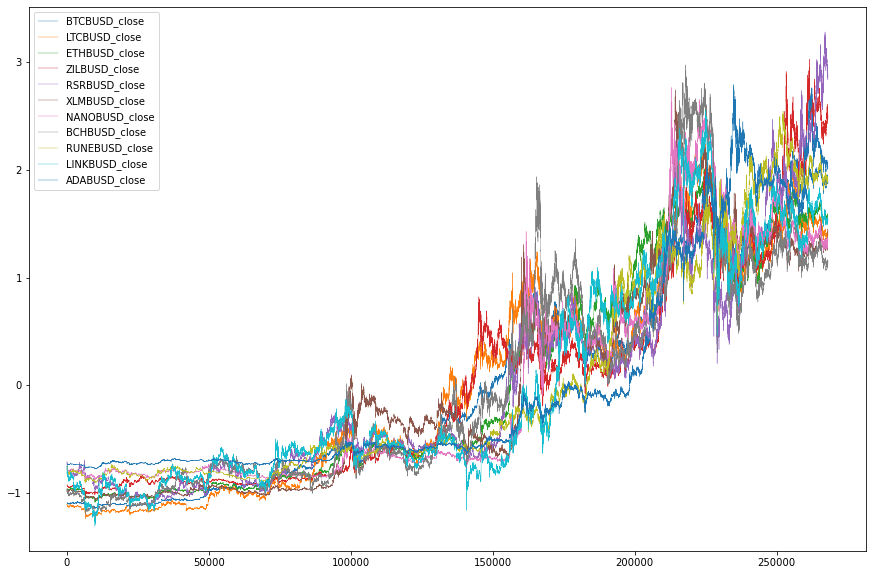

In [44]:
scaled_binance = pd.DataFrame(scaler_d.fit_transform(main_df),columns = main_df.columns)
scaled_binance.plot(linewidth=0.4)

<AxesSubplot:>

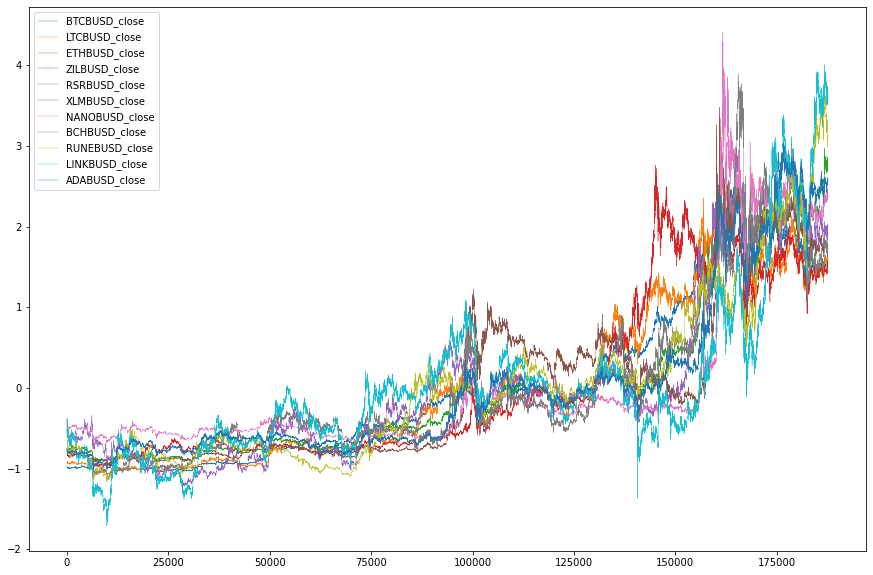

In [45]:
train_df_d_correct.plot(linewidth=0.4)

<AxesSubplot:>

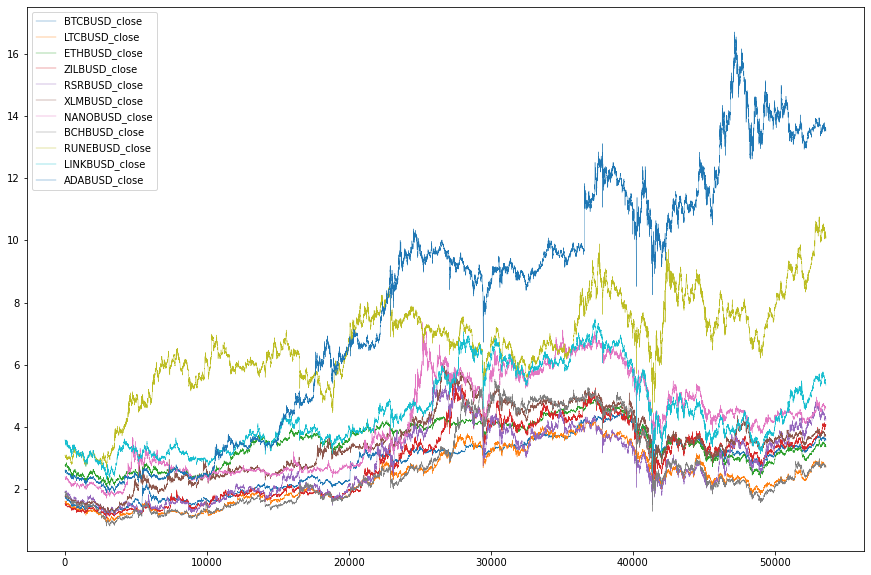

In [46]:
val_df_d_correct.plot(linewidth=0.4)

<AxesSubplot:>

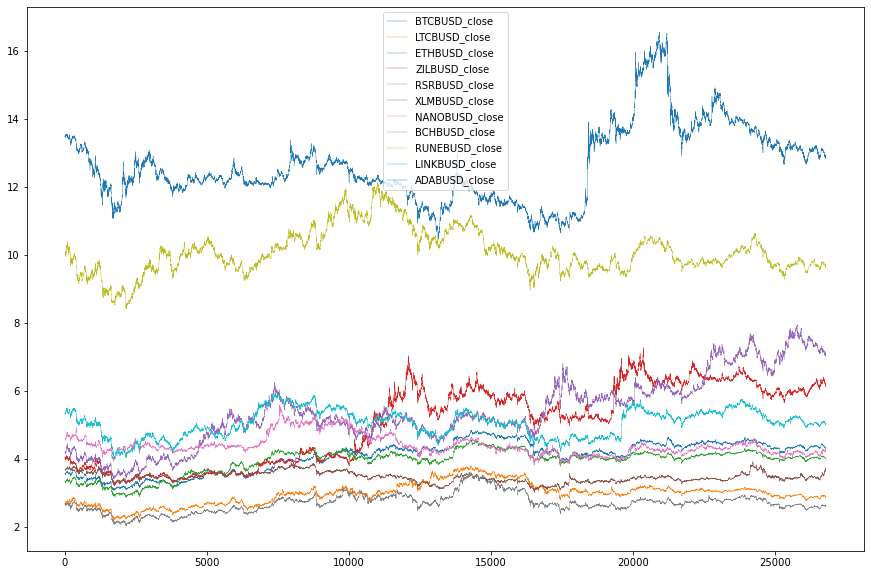

In [47]:
test_df_d_correct.plot(linewidth=0.4)

<AxesSubplot:>

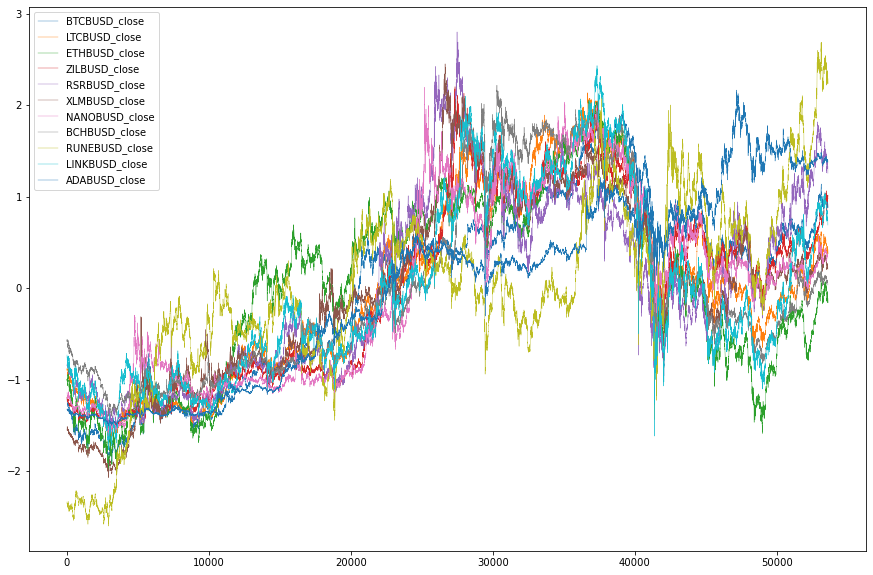

In [48]:
val_df_d = pd.DataFrame(scaler_d.fit_transform(val_df_d),columns = val_df_d.columns)

val_df_d.plot(linewidth=0.4)

<AxesSubplot:>

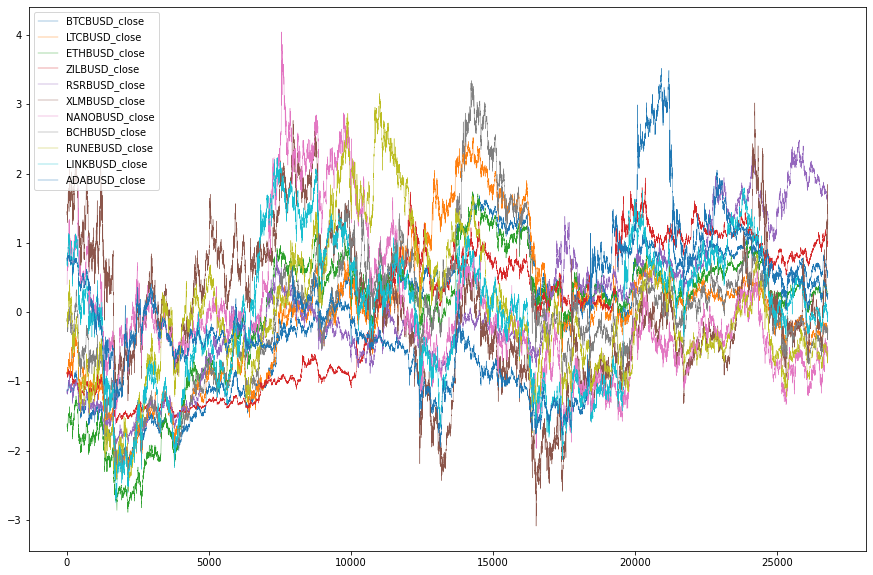

In [49]:
test_df_d = pd.DataFrame(scaler_d.fit_transform(test_df_d),columns = test_df_d.columns)

test_df_d.plot(linewidth=0.4)

<AxesSubplot:>

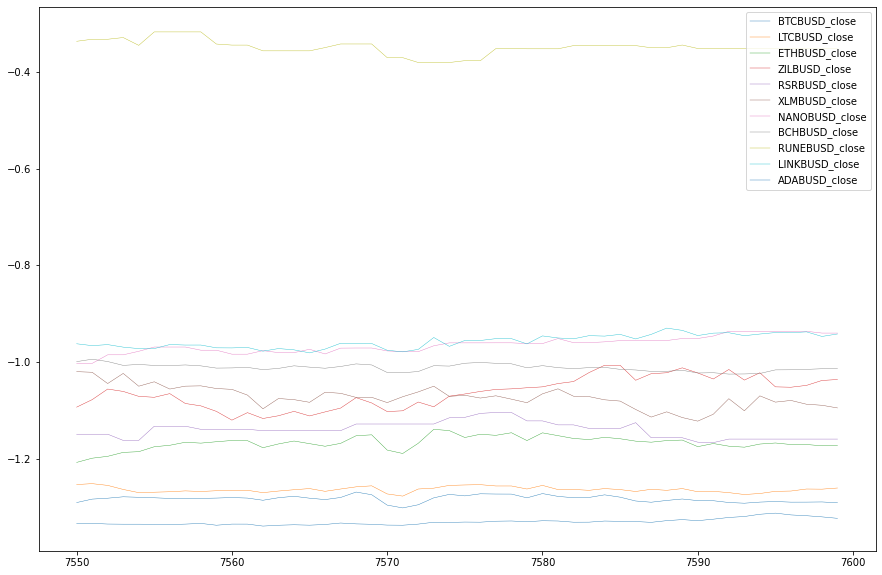

In [50]:
val_df_d[7550:7600].plot(linewidth=0.4)

### Exploring datasets

Lets plot datasets  

array([<AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>], dtype=object)

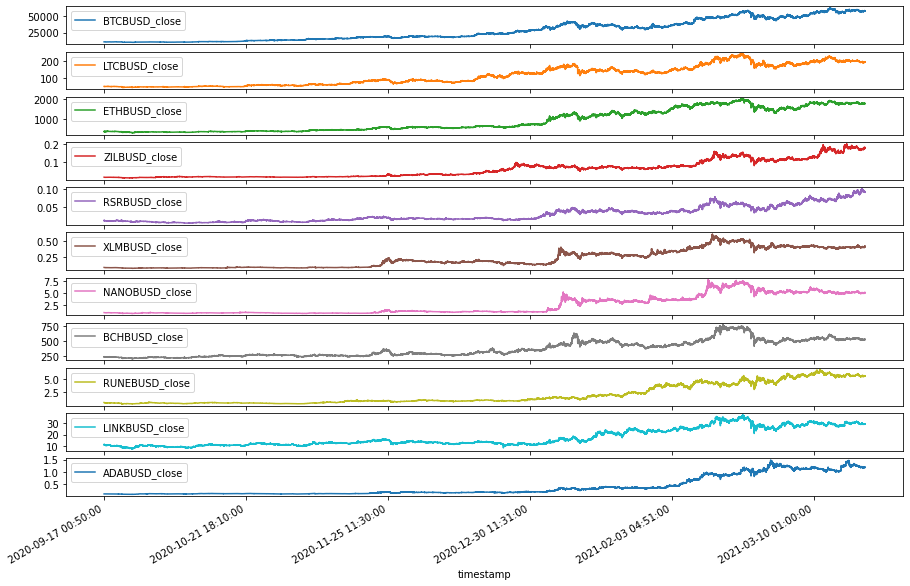

In [51]:
main_df.plot(subplots=True)

Smaller resolution. This is quite interesting. 

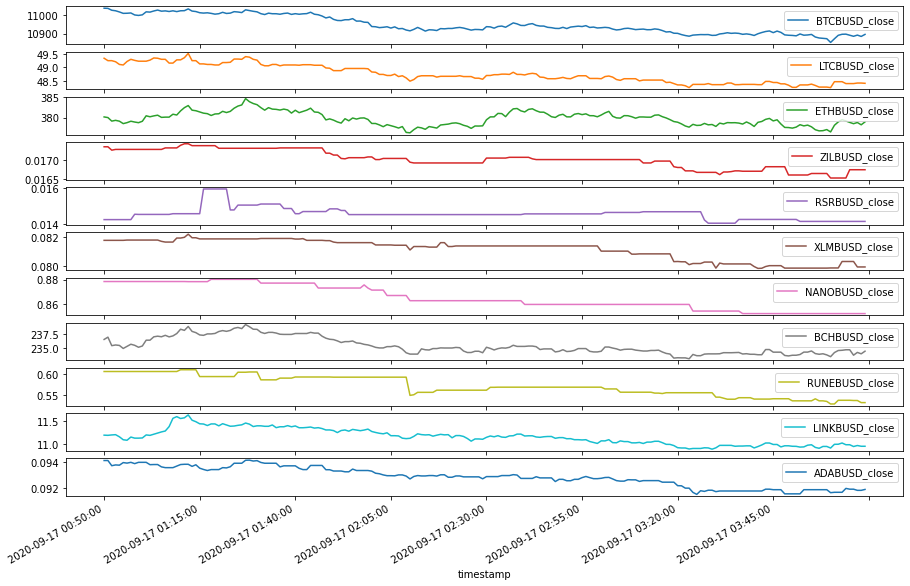

In [52]:
main_df[:200].plot(subplots=True)
plt.show()

Data is not quite good at the beginning that why I will remove some part of it 

There is a strong realtion between prices

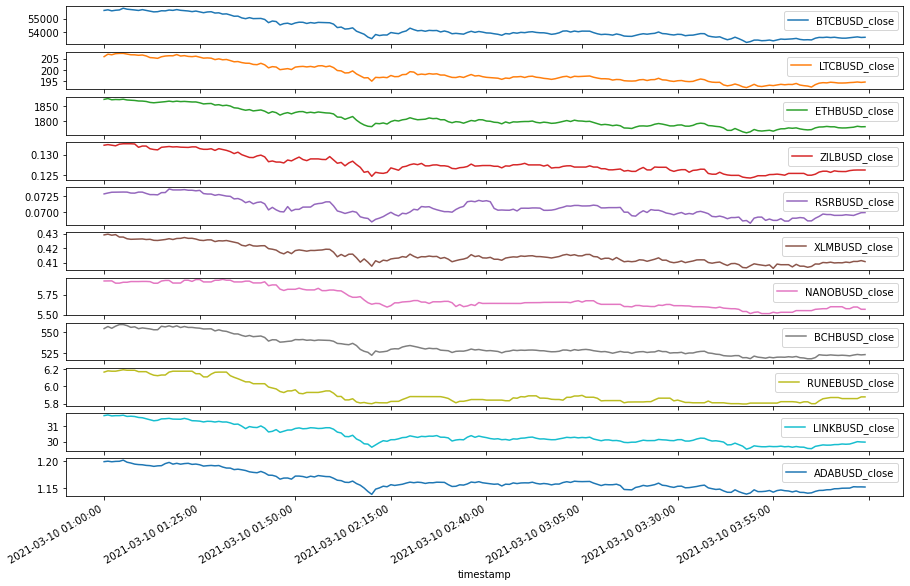

In [53]:
main_df[250000:250200].plot(subplots=True)
plt.show()

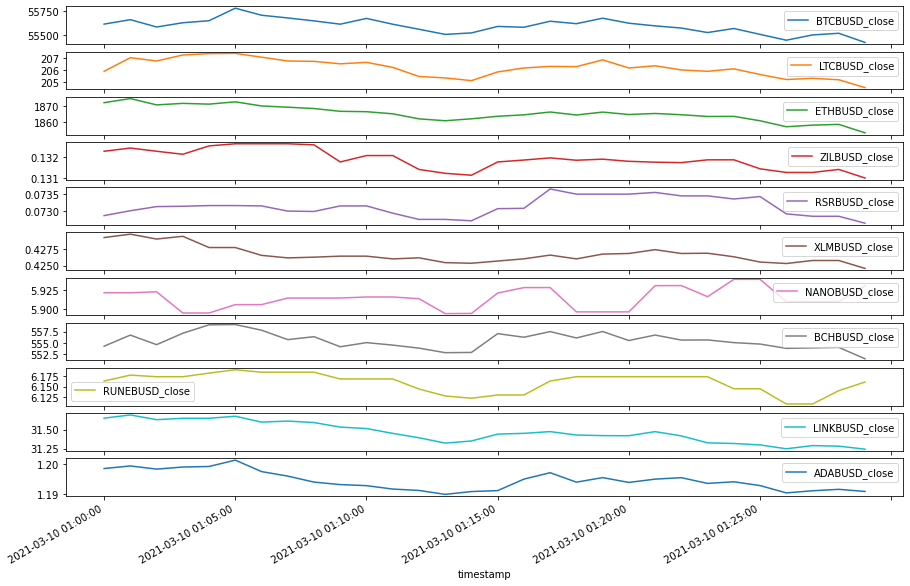

In [54]:
main_df[250000:250030].plot(subplots=True)
plt.show()

## Preprocessing

scaling values

In [55]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer, PowerTransformer

standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()
robust_scaler = RobustScaler()
quantile = QuantileTransformer()
power = PowerTransformer()


### Percentage change

In [56]:
binance_df_percentage = main_df.pct_change()

In [57]:
binance_df_percentage

BTCBUSD_close  LTCBUSD_close  ETHBUSD_close  \
timestamp                                                          
2020-09-17 00:50:00            NaN            NaN            NaN   
2020-09-17 00:51:00      -0.000083      -0.001824      -0.000421   
2020-09-17 00:52:00      -0.000913       0.000000      -0.002289   
2020-09-17 00:53:00      -0.000258      -0.000812       0.000501   
2020-09-17 00:54:00      -0.000572      -0.002032      -0.000554   
...                            ...            ...            ...   
2021-03-22 12:55:00      -0.000093      -0.000308      -0.000264   
2021-03-22 12:56:00       0.001165       0.002104       0.000814   
2021-03-22 12:57:00       0.001856       0.001997       0.000875   
2021-03-22 12:58:00      -0.000826      -0.000818      -0.000443   
2021-03-22 12:59:00      -0.000624      -0.000869      -0.000420   

                     ZILBUSD_close  RSRBUSD_close  XLMBUSD_close  \
timestamp                                                          
2020-09-17 00:50:00            NaN            NaN            NaN   
2020-09-17 00:51:00       0.000000       0.000000       0.000000   
2020-09-17 00:52:00      -0.005184       0.000000       0.000000   
2020-09-17 00:53:00       0.001158       0.000000       0.000000   
2020-09-17 00:54:00       0.000000       0.000000       0.000000   
...                            ...            ...            ...   
2021-03-22 12:55:00       0.001180       0.000000      -0.000523   
2021-03-22 12:56:00       0.000393       0.000000      -0.001570   
2021-03-22 12:57:00       0.001684      -0.000328      -0.001930   
2021-03-22 12:58:00      -0.002465       0.001640      -0.003628   
2021-03-22 12:59:00       0.000000       0.000000      -0.000024   

                     NANOBUSD_close  BCHBUSD_close  RUNEBUSD_close  \
timestamp                                                            
2020-09-17 00:50:00             NaN            NaN             NaN   
2020-09-17 00:51:00        0.000000       0.001691        0.000000   
2020-09-17 00:52:00        0.000000      -0.006288        0.000000   
2020-09-17 00:53:00        0.000000       0.000510        0.000000   
2020-09-17 00:54:00        0.000000      -0.000340        0.000000   
...                             ...            ...             ...   
2021-03-22 12:55:00       -0.004012      -0.000038        0.004854   
2021-03-22 12:56:00        0.000000       0.001702       -0.000233   
2021-03-22 12:57:00        0.005952       0.002157        0.001850   
2021-03-22 12:58:00        0.000000      -0.000876        0.001829   
2021-03-22 12:59:00        0.000000       0.000114        0.001217   

                     LINKBUSD_close  ADABUSD_close  
timestamp                                           
2020-09-17 00:50:00             NaN            NaN  
2020-09-17 00:51:00       -0.000339       0.000000  
2020-09-17 00:52:00        0.000777      -0.004249  
2020-09-17 00:53:00        0.000536       0.000640  
2020-09-17 00:54:00       -0.004248      -0.000213  
...                             ...            ...  
2021-03-22 12:55:00       -0.000822      -0.000516  
2021-03-22 12:56:00        0.001918       0.001329  
2021-03-22 12:57:00        0.001192       0.001344  
2021-03-22 12:58:00       -0.000501      -0.000752  
2021-03-22 12:59:00        0.000000       0.001141  

[268000 rows x 11 columns]

In [58]:
binance_df_percentage.describe()

BTCBUSD_close  LTCBUSD_close  ETHBUSD_close  ZILBUSD_close  \
count   2.679990e+05  267999.000000  267999.000000  267999.000000   
mean    6.959935e-06       0.000007       0.000007       0.000013   
std     1.276960e-03       0.001904       0.001541       0.002848   
min    -4.094003e-02      -0.050904      -0.046160      -0.051323   
25%    -4.962396e-04      -0.000733      -0.000610      -0.000130   
50%     2.101402e-07       0.000000       0.000000       0.000000   
75%     5.023744e-04       0.000748       0.000622       0.000389   
max     3.340955e-02       0.045733       0.043255       0.060086   

       RSRBUSD_close  XLMBUSD_close  NANOBUSD_close  BCHBUSD_close  \
count  267999.000000  267999.000000   267999.000000  267999.000000   
mean        0.000013       0.000010        0.000012       0.000005   
std         0.003380       0.002641        0.003170       0.001829   
min        -0.073262      -0.063424       -0.060392      -0.075748   
25%         0.000000      -0.000475        0.000000      -0.000653   
50%         0.000000       0.000000        0.000000       0.000000   
75%         0.000000       0.000510        0.000000       0.000659   
max         0.094585       0.071819        0.086481       0.043671   

       RUNEBUSD_close  LINKBUSD_close  ADABUSD_close  
count   267999.000000   267999.000000  267999.000000  
mean         0.000012        0.000006       0.000012  
std          0.002800        0.002147       0.002297  
min         -0.099398       -0.056232      -0.080826  
25%          0.000000       -0.000938      -0.000814  
50%          0.000000        0.000000       0.000000  
75%          0.000000        0.000949       0.000839  
max          0.134913        0.060853       0.065333

array([<AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>], dtype=object)

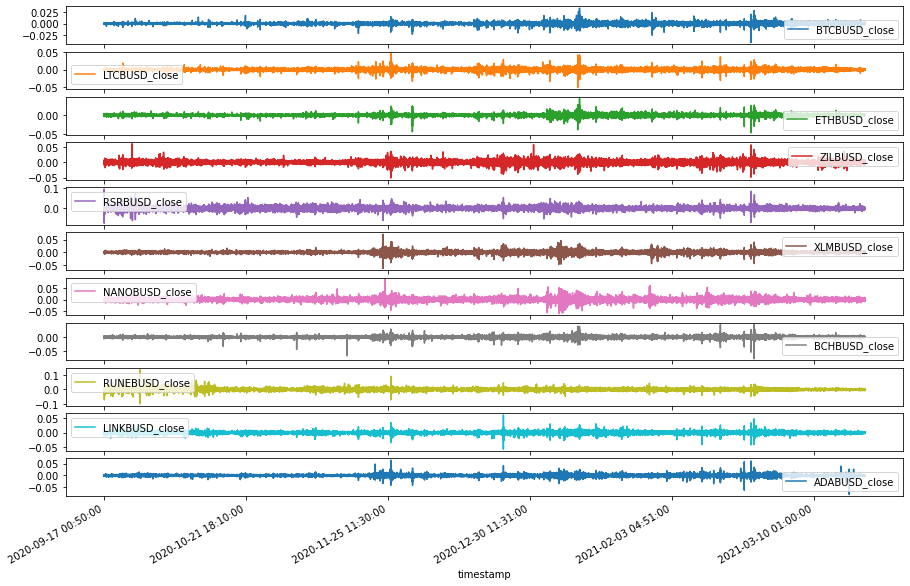

In [59]:
binance_df_percentage.plot(subplots=True)

<AxesSubplot:xlabel='timestamp'>

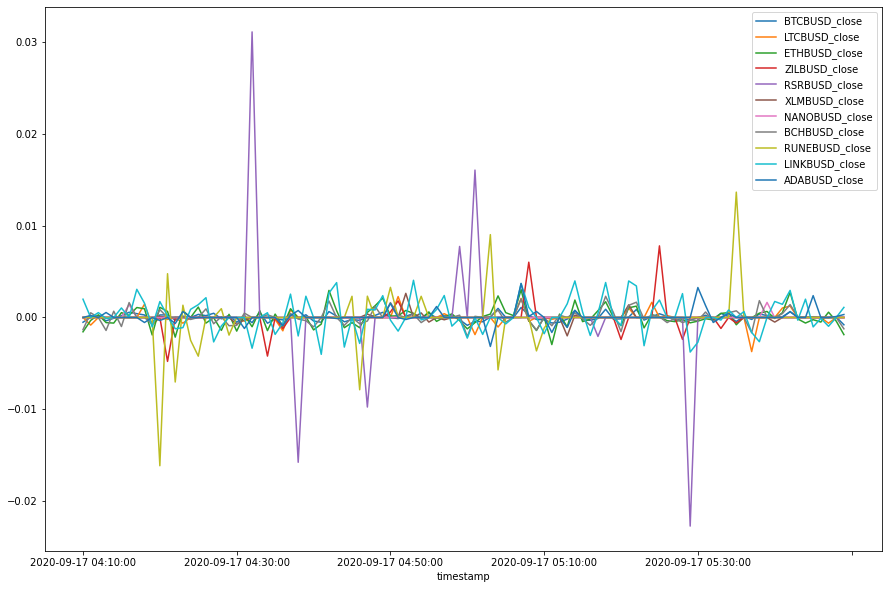

In [60]:
binance_df_percentage[200:300].plot()

In [61]:
scaled_bin_percentage_df_min_max = pd.DataFrame(min_max_scaler.fit_transform(binance_df_percentage),columns = binance_df_percentage.columns)

<AxesSubplot:>

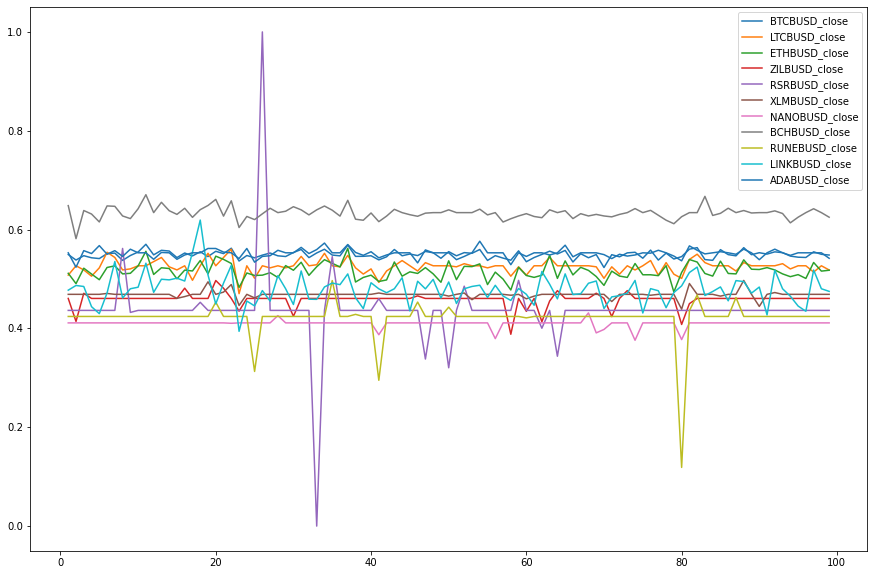

In [62]:
scaled_bin_percentage_df_min_max[:100].plot()

In [63]:
scaled_bin_percentage_df_min_max.describe()

BTCBUSD_close  LTCBUSD_close  ETHBUSD_close  ZILBUSD_close  \
count  267999.000000  267999.000000  267999.000000  267999.000000   
mean        0.550736       0.526828       0.516319       0.460785   
std         0.017175       0.019707       0.017230       0.025564   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.543968       0.519168       0.509422       0.459502   
50%         0.550645       0.526756       0.516242       0.460670   
75%         0.557399       0.534493       0.523199       0.464165   
max         1.000000       1.000000       1.000000       1.000000   

       RSRBUSD_close  XLMBUSD_close  NANOBUSD_close  BCHBUSD_close  \
count  267999.000000  267999.000000   267999.000000  267999.000000   
mean        0.436557       0.469034        0.411265       0.634345   
std         0.020140       0.019525        0.021583       0.015315   
min         0.000000       0.000000        0.000000       0.000000   
25%         0.436481       0.465449        0.411186       0.628841   
50%         0.436481       0.468963        0.411186       0.634307   
75%         0.436481       0.472734        0.411186       0.639821   
max         1.000000       1.000000        1.000000       1.000000   

       RUNEBUSD_close  LINKBUSD_close  ADABUSD_close  
count   267999.000000   267999.000000  267999.000000  
mean         0.424264        0.480317       0.553082  
std          0.011951        0.018338       0.015715  
min          0.000000        0.000000       0.000000  
25%          0.424212        0.472256       0.547431  
50%          0.424212        0.480267       0.552999  
75%          0.424212        0.488376       0.558740  
max          1.000000        1.000000       1.000000

#### Min max

In [64]:
scaled_bin_df_min_max = pd.DataFrame(min_max_scaler.fit_transform(main_df),columns = main_df.columns)

<AxesSubplot:>

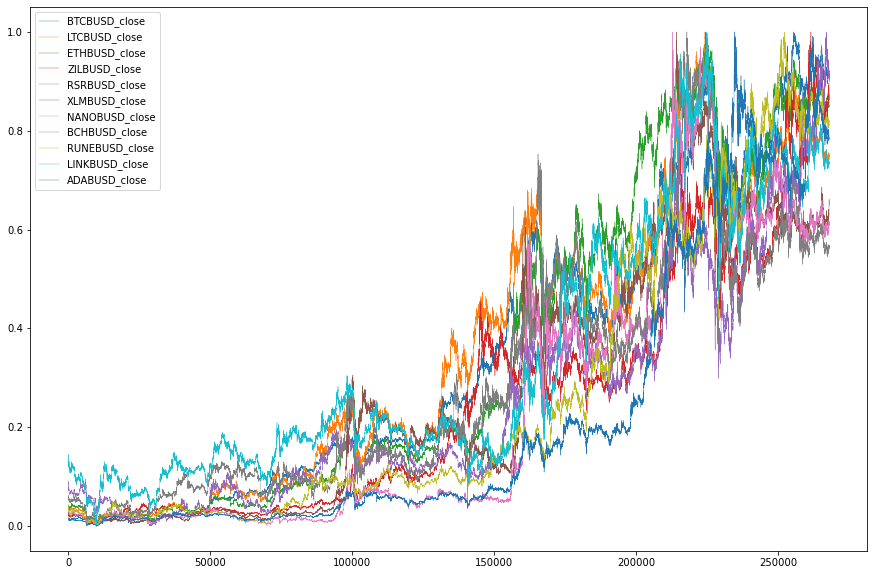

In [65]:
scaled_bin_df_min_max.plot(linewidth=0.4)

#### Z-score

In [66]:
scaled_bin_df_z_score = pd.DataFrame(standard_scaler.fit_transform(main_df),columns = main_df.columns)

<AxesSubplot:>

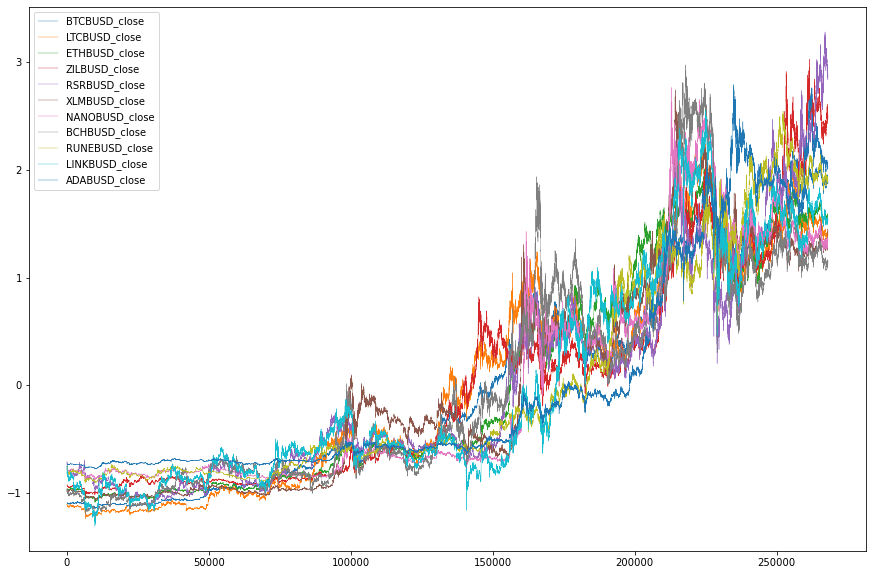

In [67]:
scaled_bin_df_z_score.plot(linewidth=0.4)

<AxesSubplot:>

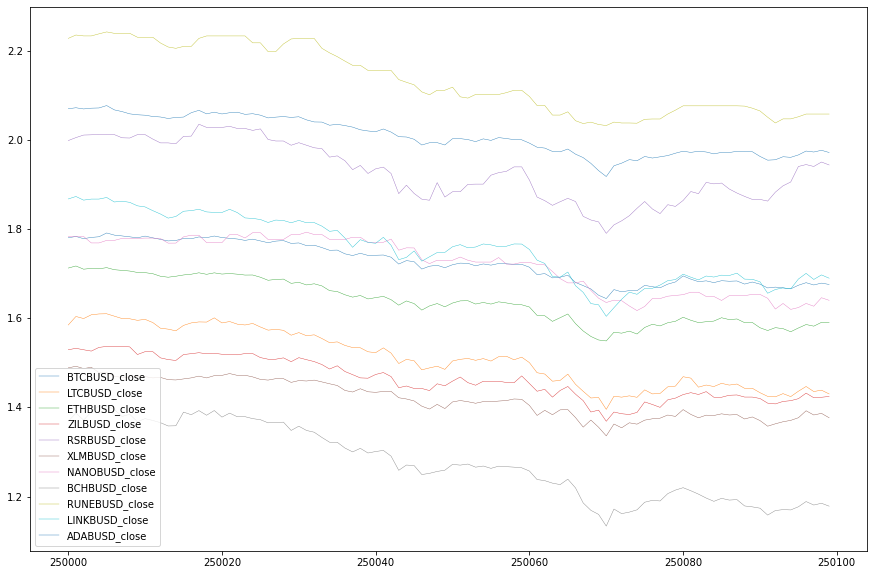

In [68]:
scaled_bin_df_z_score[250000:250100].plot(linewidth=0.4)

#### robust_scaler

In [69]:
scaled_bin_df_robust = pd.DataFrame(robust_scaler.fit_transform(main_df),columns = main_df.columns)

<AxesSubplot:>

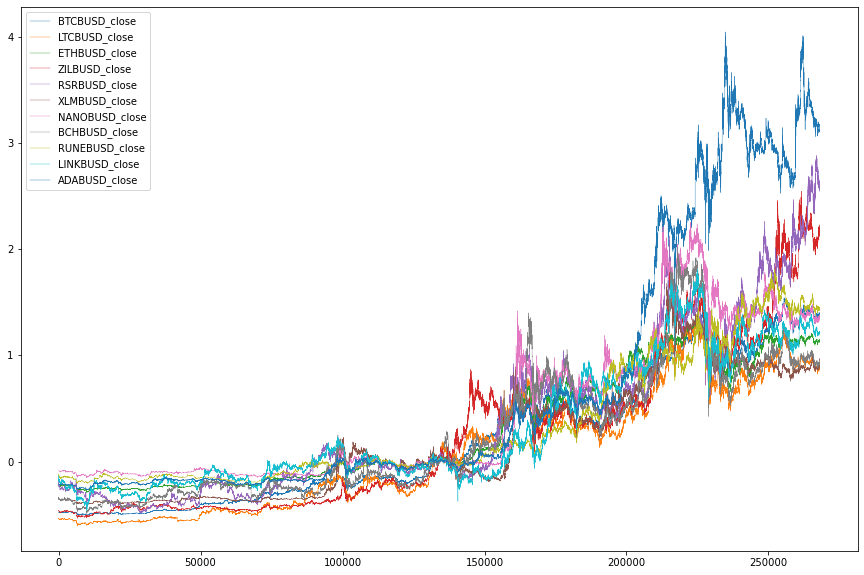

In [70]:
scaled_bin_df_robust.plot(linewidth=0.4)

Another option

In [71]:
robust_scaler_option1 = RobustScaler(quantile_range = (49,51))

In [72]:
scaled_bin_df_robust_option1 = pd.DataFrame(robust_scaler_option1.fit_transform(main_df),columns = main_df.columns)

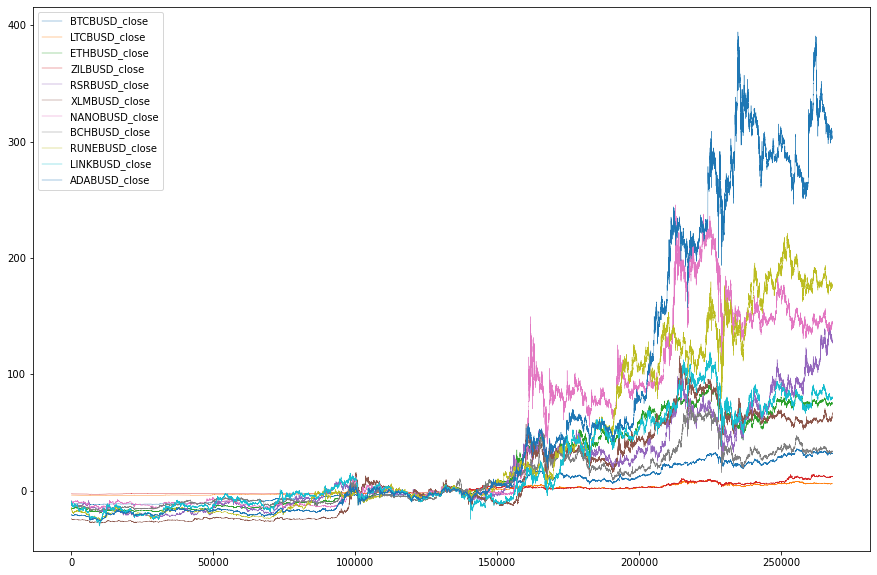

In [73]:
scaled_bin_df_robust_option1.plot(linewidth=0.4)
plt.show()

#### Quantile

In [74]:
scaled_bin_df_quantile = pd.DataFrame(quantile.fit_transform(main_df),columns = main_df.columns)

<AxesSubplot:>

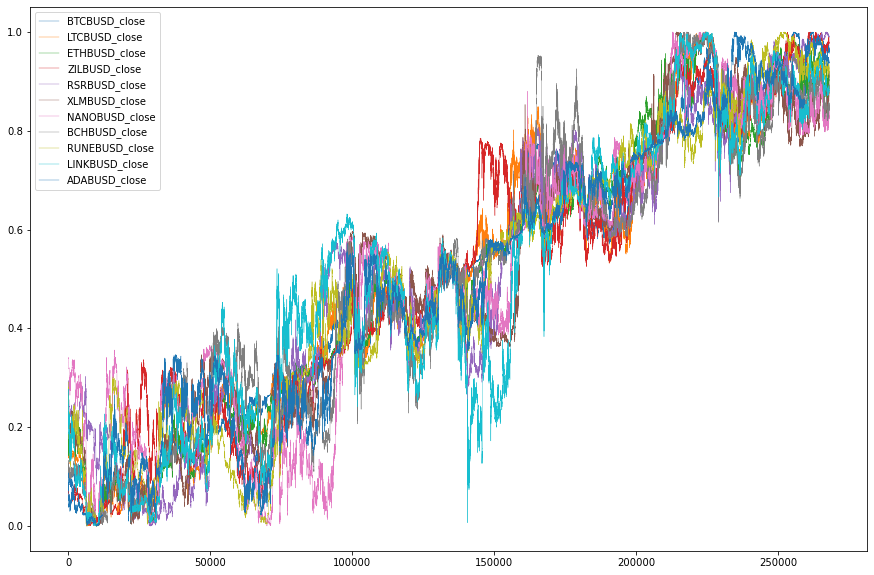

In [75]:
scaled_bin_df_quantile.plot(linewidth=0.4)

### Log scaling

In [76]:
binance_log_df = np.log(main_df)

<AxesSubplot:xlabel='timestamp'>

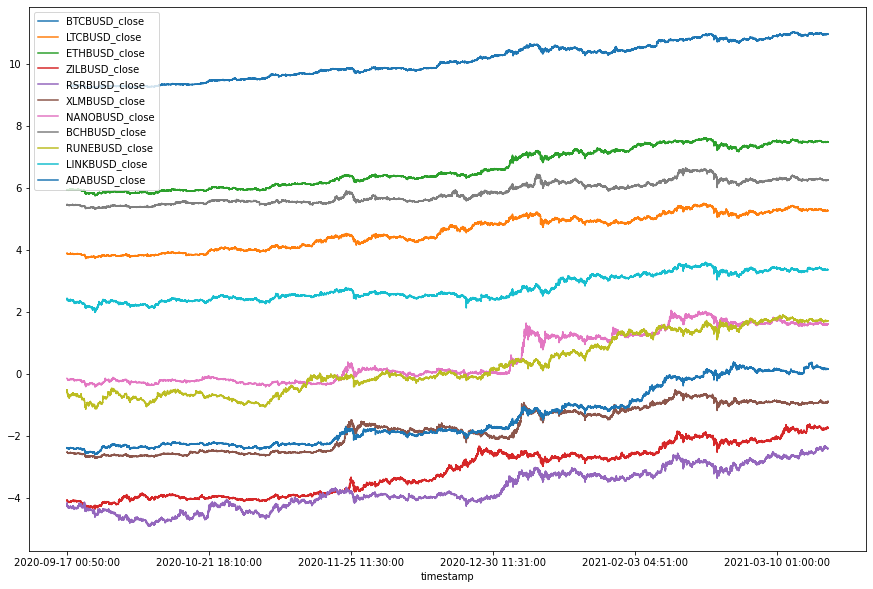

In [77]:
binance_log_df.plot()

In [78]:
scaled_log_df_min_max = pd.DataFrame(standard_scaler.fit_transform(binance_log_df),columns = main_df.columns)

In [79]:
scaled_df_min_max = pd.DataFrame(standard_scaler.fit_transform(main_df),columns = main_df.columns)

<AxesSubplot:>

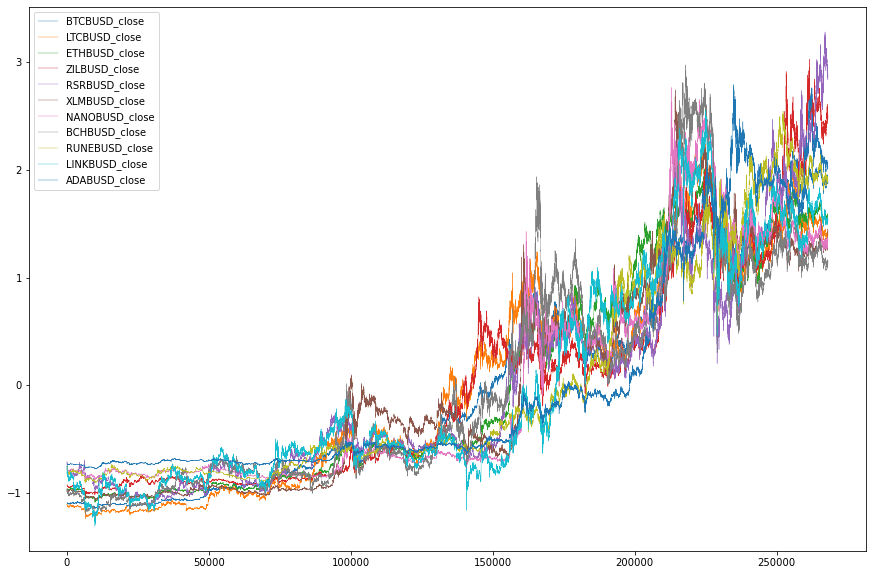

In [80]:
scaled_df_min_max.plot(linewidth=0.4)

<AxesSubplot:>

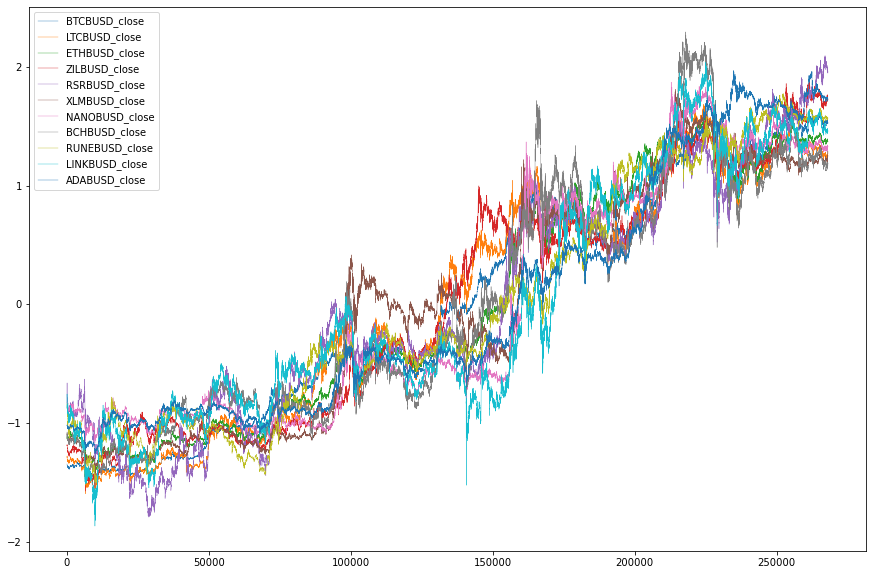

In [81]:
scaled_log_df_min_max.plot(linewidth=0.4)

### More smaller learning datasets

<AxesSubplot:xlabel='timestamp'>

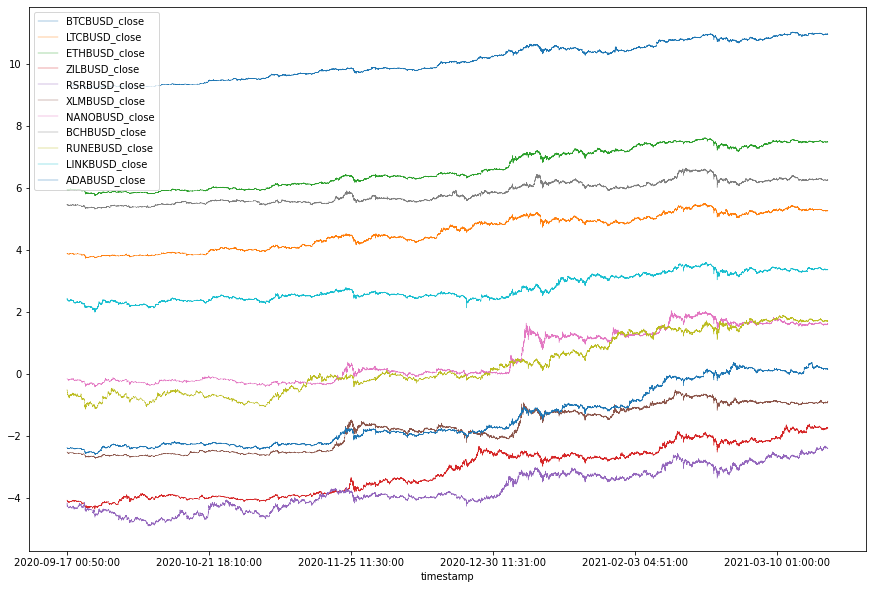

In [82]:
binance_log_df.plot(linewidth=0.4)

<AxesSubplot:xlabel='timestamp'>

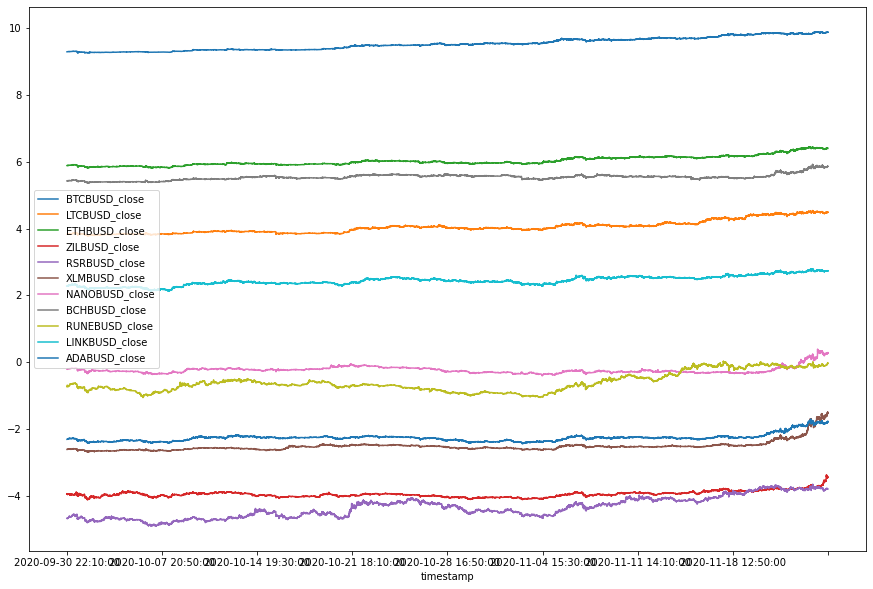

In [83]:
binance_log_df[20000:100000].plot()

In [84]:
binance_train_df_1 = pd.DataFrame(standard_scaler.fit_transform(main_df[30000:70000]),columns = main_df.columns)

<AxesSubplot:>

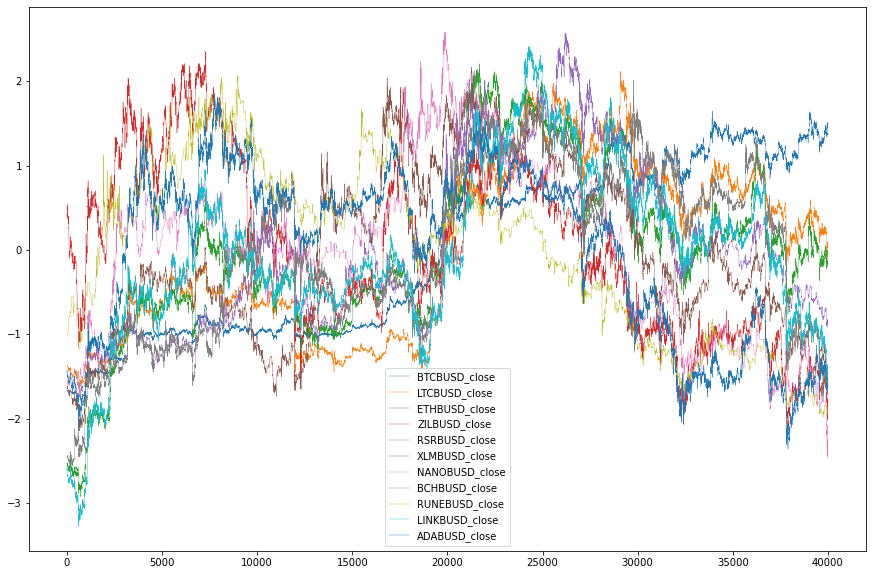

In [85]:
binance_train_df_1.plot(linewidth=0.4)

In [86]:
binance_train_df_log_1 = pd.DataFrame(standard_scaler.fit_transform(binance_log_df[30000:70000]),columns = main_df.columns)

<AxesSubplot:>

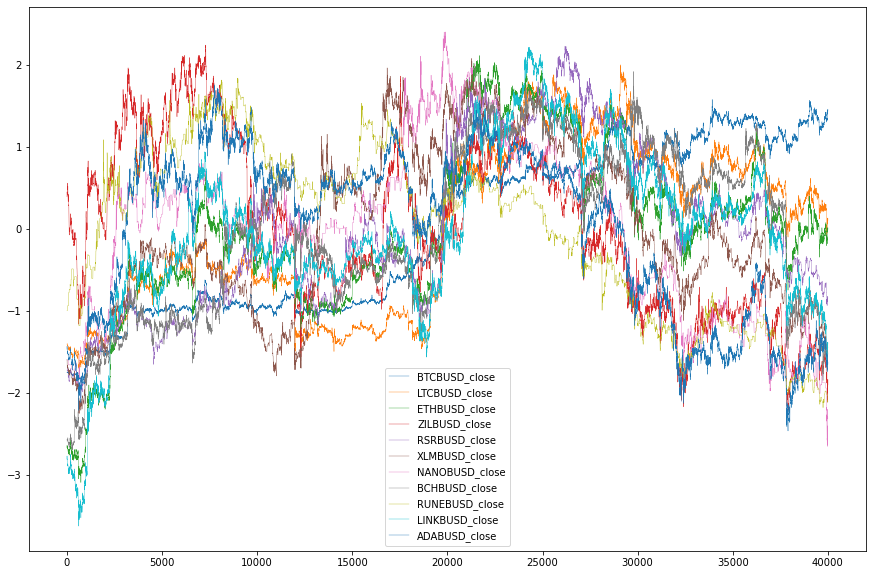

In [87]:
binance_train_df_log_1.plot(linewidth=0.4)

## Scale individually 

array([<AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>], dtype=object)

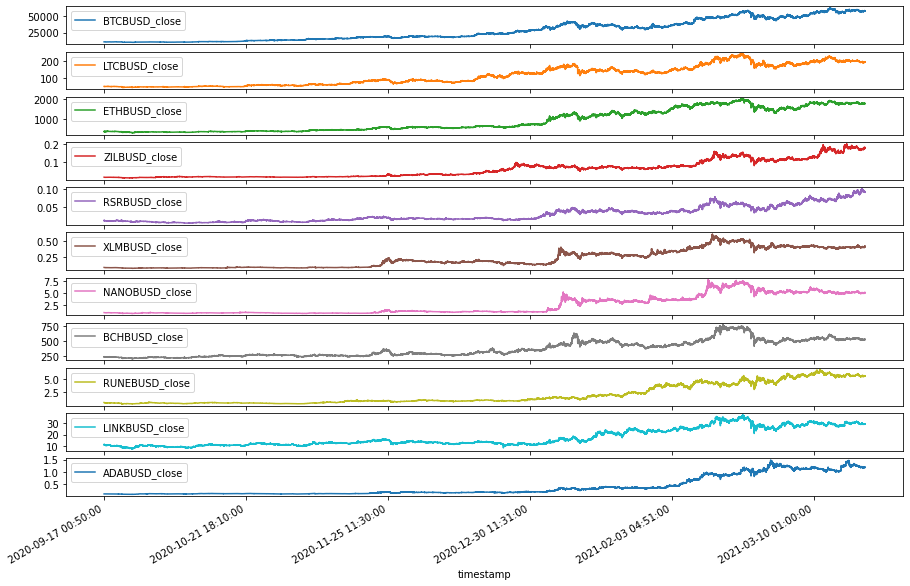

In [88]:
main_df.plot(subplots=True)

In [89]:
main_df.columns

Index(['BTCBUSD_close', 'LTCBUSD_close', 'ETHBUSD_close', 'ZILBUSD_close',
       'RSRBUSD_close', 'XLMBUSD_close', 'NANOBUSD_close', 'BCHBUSD_close',
       'RUNEBUSD_close', 'LINKBUSD_close', 'ADABUSD_close'],
      dtype='object')

In [90]:
independent_df = main_df.copy()

In [91]:
independent_df["BTCBUSD_close"] = independent_df["BTCBUSD_close"] / independent_df["BTCBUSD_close"].max()
independent_df["LTCBUSD_close"] = independent_df["LTCBUSD_close"] / independent_df["LTCBUSD_close"].max()
independent_df["ETHBUSD_close"] = independent_df["ETHBUSD_close"] / independent_df["ETHBUSD_close"].max()
independent_df["ZILBUSD_close"] = independent_df["ZILBUSD_close"] / independent_df["ZILBUSD_close"].max()
independent_df["RSRBUSD_close"] = independent_df["RSRBUSD_close"] / independent_df["RSRBUSD_close"].max()
independent_df["XLMBUSD_close"] = independent_df["XLMBUSD_close"] / independent_df["XLMBUSD_close"].max()
independent_df["NANOBUSD_close"] = independent_df["NANOBUSD_close"] / independent_df["NANOBUSD_close"].max()
independent_df["BCHBUSD_close"] = independent_df["BCHBUSD_close"] / independent_df["BCHBUSD_close"].max()
independent_df["RUNEBUSD_close"] = independent_df["RUNEBUSD_close"] / independent_df["RUNEBUSD_close"].max()
independent_df["LINKBUSD_close"] = independent_df["LINKBUSD_close"] / independent_df["LINKBUSD_close"].max()
independent_df["ADABUSD_close"] = independent_df["ADABUSD_close"] / independent_df["ADABUSD_close"].max()

<AxesSubplot:xlabel='timestamp'>

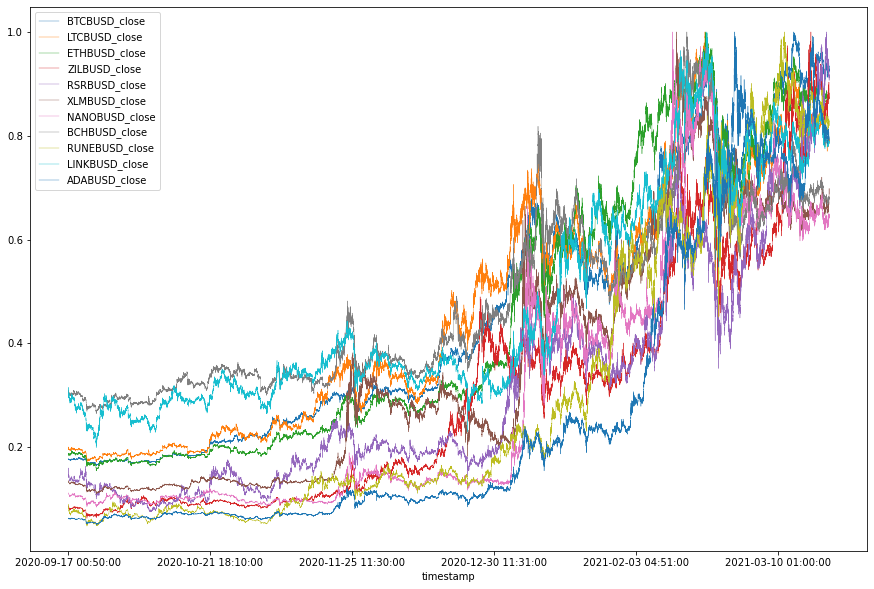

In [92]:
independent_df.plot(linewidth=0.4)

### Size equal to size of the window

In [93]:
test_part = main_df[100200:100400]

In [94]:
test_part.describe()

BTCBUSD_close  LTCBUSD_close  ETHBUSD_close  ZILBUSD_close  \
count     200.000000     200.000000     200.000000     200.000000   
mean    19101.422450      87.329400     592.050650       0.032197   
std       128.706889       0.687335       3.873295       0.000499   
min     18830.000000      85.720000     583.600000       0.031290   
25%     18997.150000      86.770000     588.742500       0.031845   
50%     19071.645000      87.180000     592.005000       0.032070   
75%     19242.647500      87.990000     595.752500       0.032580   
max     19327.470000      88.440000     597.770000       0.033440   

       RSRBUSD_close  XLMBUSD_close  NANOBUSD_close  BCHBUSD_close  \
count     200.000000     200.000000      200.000000     200.000000   
mean        0.022375       0.222019        1.364433     341.266800   
std         0.000267       0.002763        0.025057       2.117003   
min         0.021890       0.216240        1.319300     335.490000   
25%         0.022180       0.220110        1.343300     339.707500   
50%         0.022290       0.221770        1.367700     340.935000   
75%         0.022582       0.223243        1.387975     343.087500   
max         0.022820       0.231890        1.401600     345.420000   

       RUNEBUSD_close  LINKBUSD_close  ADABUSD_close  
count      200.000000      200.000000     200.000000  
mean         0.960825       15.224095       0.169096  
std          0.008991        0.091192       0.001431  
min          0.943900       15.025200       0.165850  
25%          0.955200       15.149450       0.168150  
50%          0.965250       15.200000       0.169170  
75%          0.966200       15.308800       0.170183  
max          0.971300       15.389500       0.172370

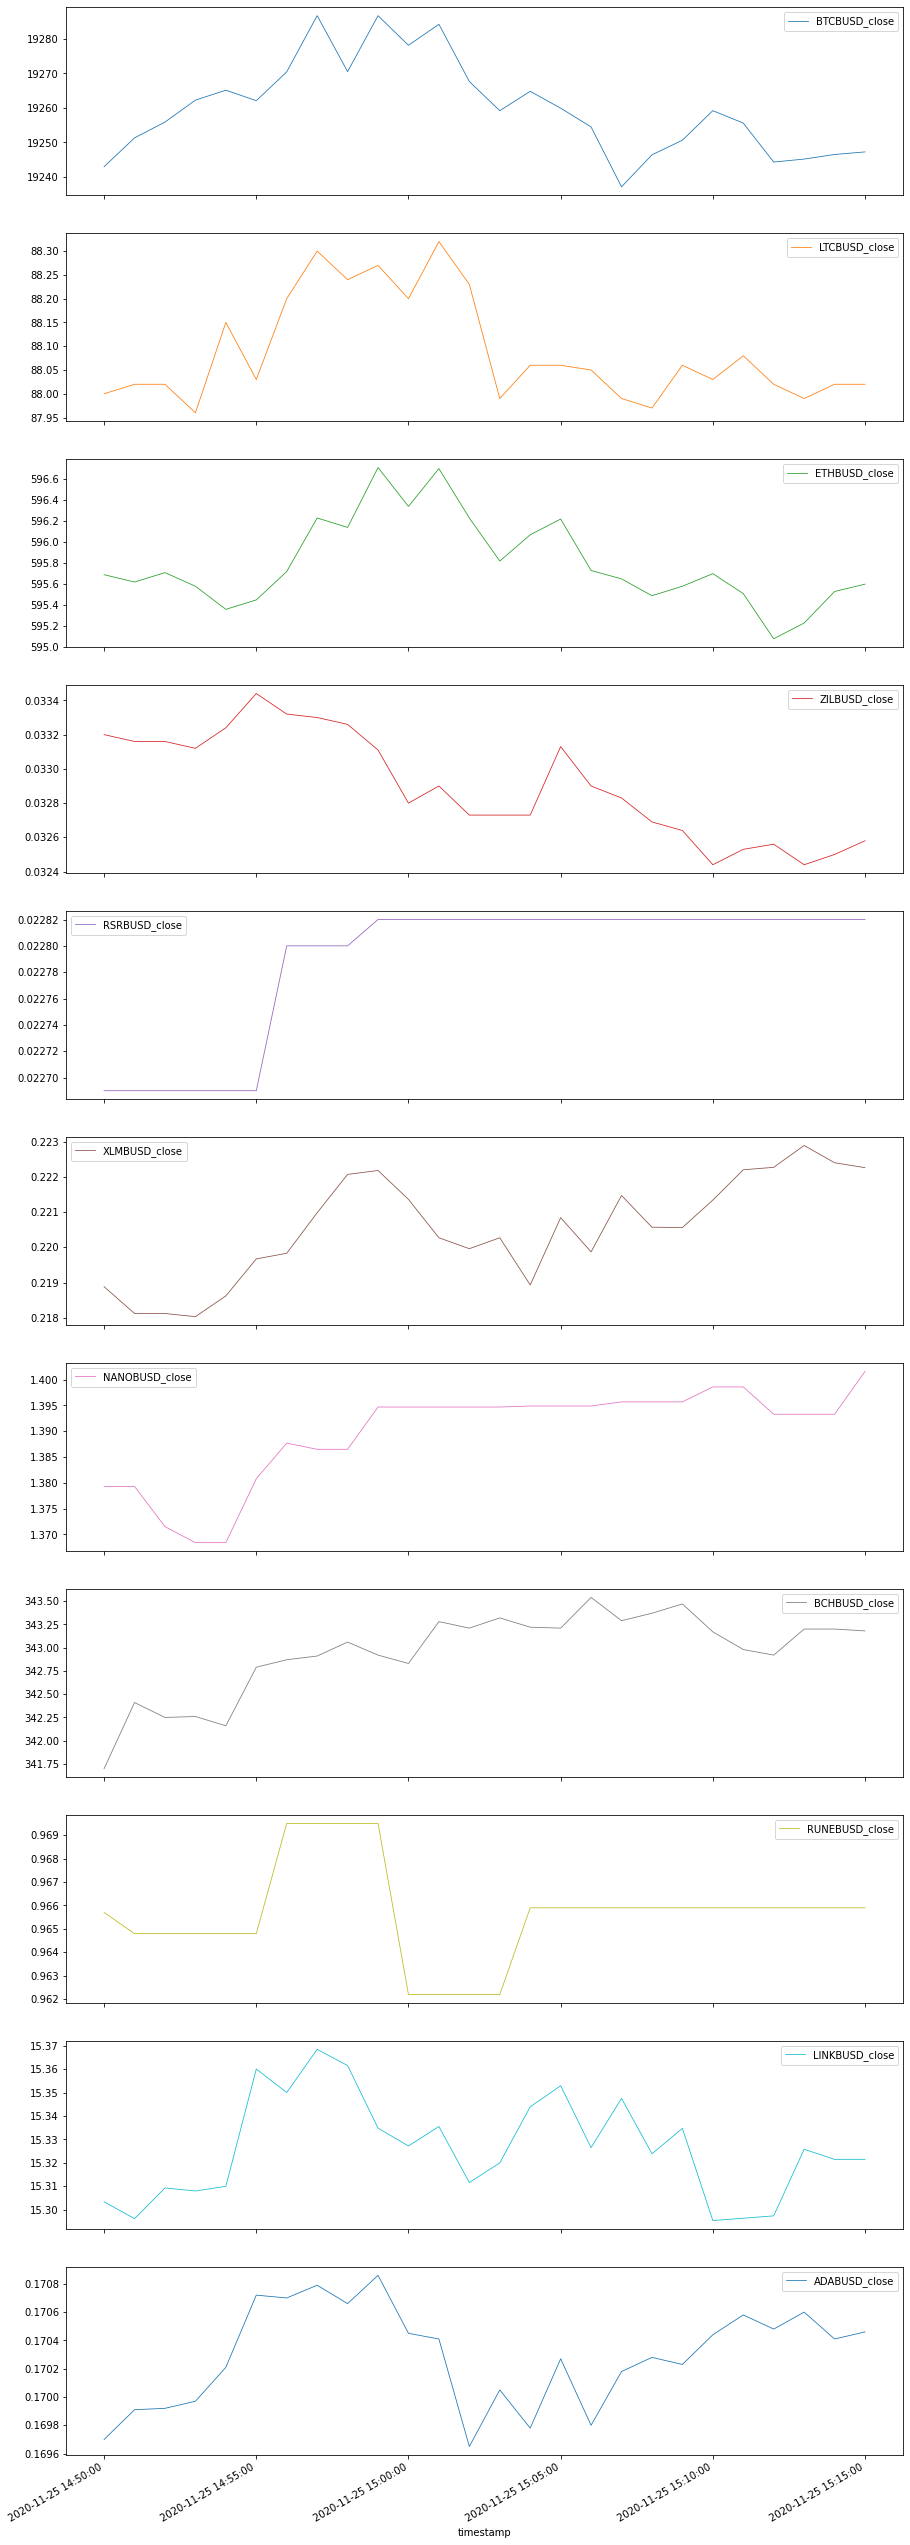

In [95]:
test_part.head(26).plot(linewidth=0.8, subplots=True, figsize=(15, 50))
plt.show()

In [96]:
scaled_bin_df_robust = pd.DataFrame(min_max.fit_transform(test_part.head(26)),columns = test_part.columns)

NameError: name 'min_max' is not defined

In [ ]:
scaled_bin_df_robust.plot()